In [682]:
# Upload libraries
%reload_ext autoreload
%autoreload 2

import sys; sys.path.append(r'../../src');
import spiplot
from spi_results import spi_results, list_db, load_db
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

# LaTeX fonts
import matplotlib
%matplotlib inline
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist]);

magic = 1405

#neural network
import numpy as np
import scipy.special as sps
import matplotlib.pyplot as plt
from numpy import random


#filter
import scipy as sp
import scipy.ndimage


from statsmodels.graphics import tsaplots
import statsmodels
from statsmodels.graphics.tsaplots import plot_acf

from scipy.stats import skew
from scipy.stats import mode

In [683]:
# Define functions
def getKurt(values,counts,threshold=5):
    # Calculates Kurtosis for a given histogram:
    # values - bin centers; 
    # counts - total instances in a bin; 
    # threshold - dimensionless value (initial 5) to filter out outliers through abs deviation (not to distort higher momentums)
    
    counts = np.array(counts/np.sum(counts))
    values = np.array(values)
    avg = np.dot(counts,values)

    meanabs = np.dot(counts,abs(values-avg))
    indtokeep = [i for i in range(len(values)) if abs(values[i]-avg)<meanabs*threshold]
    values = [values[i] for i in indtokeep]
    counts = [counts[i] for i in indtokeep]
    
    sumcounts = np.sum(counts)
    if sumcounts==0:
        return magic
    counts = np.array(counts/sumcounts)
    avg = np.dot(counts,values)

    std = np.sqrt(np.dot(counts, (values-avg)**2))
    if std==0:
        return magic
    avg4 = np.dot(counts, (values-avg)**4)
    kur = avg4/(std**4)-3
    
    return kur

def getSkew(values,counts,threshold=5):
    # Calculates Skewness for a given histogram:
    # values - bin centers; 
    # counts - total instances in a bin; 
    # threshold - dimensionless value (initial 5) to filter out outliers through abs deviation (not to distort higher momentums)
    
    counts = np.array(counts/np.sum(counts))
    values = np.array(values)
    avg = np.dot(counts,values)

    meanabs = np.dot(counts,abs(values-avg))
    indtokeep = [i for i in range(len(values)) if abs(values[i]-avg)<meanabs*threshold]
    values = [values[i] for i in indtokeep]
    counts = [counts[i] for i in indtokeep]
    
    sumcounts = np.sum(counts)
    if sumcounts==0:
        return magic
    counts = np.array(counts/sumcounts)
    avg = np.dot(counts,values)

    std = np.sqrt(np.dot(counts, (values-avg)**2))
    if std==0:
        return magic

    avg3 = np.dot(counts, (values-avg)**3)
    return avg3/(std**3)

def getAvg(values,counts,threshold=5):
    # Calculates Average for a given histogram:
    # values - bin centers; 
    # counts - total instances in a bin; 
    # threshold - dimensionless value (initial 5) to filter out outliers through abs deviation (not to distort higher momentums)
    
    counts = np.array(counts/np.sum(counts))
    values = np.array(values)
    avg = np.dot(counts,values)

    meanabs = np.dot(counts,abs(values-avg))
    indtokeep = [i for i in range(len(values)) if abs(values[i]-avg)<meanabs*threshold]
    values = [values[i] for i in indtokeep]
    counts = [counts[i] for i in indtokeep]
    
    sumcounts = np.sum(counts)
    if sumcounts==0:
        return magic
    counts = np.array(counts/sumcounts)
    avg = np.dot(counts,values)
    return avg


def getMedian(values,counts):
    # Calculates Median for a given histogram:
    # values - bin centers; 
    # counts - total instances in a bin; 

    counts = np.array(counts/np.sum(counts))
    values = np.array(values)
    
    CDF = np.cumsum(counts)
    idx = np.argmin(abs(CDF-0.5))
    
    return values[idx]

def getPeak(values,counts):
    # Calculates Median for a given histogram:
    # values - bin centers; 
    # counts - total instances in a bin; 

    counts = np.array(counts/np.sum(counts))
    values = np.array(values)
    

    idx = np.argmax(counts)
    
    return values[idx]

def getStd(values,counts,threshold=5):
    # Calculates Average for a given histogram:
    # values - bin centers; 
    # counts - total instances in a bin; 
    # threshold - dimensionless value (initial 5) to filter out outliers through abs deviation (not to distort higher momentums)
    
    counts = np.array(counts/np.sum(counts))
    values = np.array(values)
    avg = np.dot(counts,values)
    

    meanabs = np.dot(counts,abs(values-avg))
    indtokeep = [i for i in range(len(values)) if abs(values[i]-avg)<meanabs*threshold]
    values = [values[i] for i in indtokeep]
    counts = [counts[i] for i in indtokeep]
    
    sumcounts = np.sum(counts)
    if sumcounts==0:
        return magic
    counts = np.array(counts/sumcounts)
    avg = np.dot(counts,values)
    std = np.sqrt(np.dot(counts, (values-avg)**2))
    return std 




# Load the Data [Zero test]

In [684]:
# Load data


hdf = 'eqrun_gini_210801'
session_num =   29223231

results = load_db( session_num, hdf+'.h5')
sw = results.df_meta['swept_params']

#results.df_meta.info()
###############################################
print(' ')
print(results.df_meta['static_params'][0])
print(' ')
print(results.df.info())
print(' ')
print(sw.values[0])
print(' ')
print(results.df.columns)

df = results.df

df.head()

...reading 29223231 from dbfile: ../../../Dropbox (Equal1)/eqrun_data/hdf/eqrun_gini_210801.h5
DONE
 
Description=zero test on QEC 207 for exp decay , python_file=Fundamental_Qexp.ipynb , sn=A2 , sqf_file=zero_test.sqf , adc_channel=ch0 ch3 ch4 ch7 , nsamples=1000 , bin_width=0.01 , bin_range=half , 
 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1769232 entries, 0 to 1769231
Data columns (total 24 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   Vrd                      float64       
 1   Vrg                      float64       
 2   Vimp                     float64       
 3   loop                     float64       
 4   nsamples                 float64       
 5   bin_width                float64       
 6   testnum                  int64         
 7   Temperature              float64       
 8   Temperature_first_stage  float64       
 9   Vanop0_hist              float64       
 10  Vanop                    float64      

,Vrd,Vrg,Vimp,loop,nsamples,bin_width,testnum,Temperature,Temperature_first_stage,Vanop0_hist,...,Vanop3_avg,Vanop3_std,Vanop4_hist,Vanop4_avg,Vanop4_std,Vanop7_hist,Vanop7_avg,Vanop7_std,session_id,testtime
0,-0.5,0.0,0.0,1.0,1000.0,0.01,0,NaN,NaN,0.0,...,0.05877,0.023083,0.0,-0.215965,0.034691,0.0,-0.047229,0.090893,29223231,2021-08-04 19:00:51.023515
1,-0.5,0.0,0.0,1.0,1000.0,0.01,0,NaN,NaN,0.0,...,0.05877,0.023083,0.0,-0.215965,0.034691,0.0,-0.047229,0.090893,29223231,2021-08-04 19:00:51.023515
2,-0.5,0.0,0.0,1.0,1000.0,0.01,0,NaN,NaN,0.0,...,0.05877,0.023083,0.0,-0.215965,0.034691,0.0,-0.047229,0.090893,29223231,2021-08-04 19:00:51.023515
3,-0.5,0.0,0.0,1.0,1000.0,0.01,0,NaN,NaN,0.0,...,0.05877,0.023083,0.0,-0.215965,0.034691,0.0,-0.047229,0.090893,29223231,2021-08-04 19:00:51.023515
4,-0.5,0.0,0.0,1.0,1000.0,0.01,0,NaN,NaN,0.0,...,0.05877,0.023083,0.0,-0.215965,0.034691,0.0,-0.047229,0.090893,29223231,2021-08-04 19:00:51.023515


In [685]:
max(df.Vanop0_avg)

0.13526754098360652

## Choose relevant columns (swipe data, where parameters change)

In [686]:
varColumn=sw.values[0]
varColumn=varColumn.replace(' ', '')
varColumn=varColumn.split(',')

cols2Leave = [c.split('=')[0] for c in varColumn[:-1]]
cols2Leave.extend(['Vanop','Vanop0_hist', 'Vanop3_hist','Vanop4_hist','Vanop7_hist'])

data = results.df[cols2Leave ]

data.head()

,Vrd,Vrg,Vimp,loop,Vanop,Vanop0_hist,Vanop3_hist,Vanop4_hist,Vanop7_hist
0,-0.5,0.0,0.0,1.0,-0.407090,0.0,0.0,0.0,0.0
1,-0.5,0.0,0.0,1.0,-0.399652,0.0,0.0,0.0,0.0
2,-0.5,0.0,0.0,1.0,-0.392213,0.0,0.0,0.0,0.0
3,-0.5,0.0,0.0,1.0,-0.384775,0.0,0.0,0.0,0.0
4,-0.5,0.0,0.0,1.0,-0.377336,0.0,0.0,0.0,0.0


In [687]:



grouped = data.groupby(['loop','Vimp','Vrg','Vrd']) 


Vanops  = np.unique((data.Vanop))
Vimps  = np.unique((data.Vimp))
Vrds  = np.unique((data.Vrd))
Vrgs  = np.unique((data.Vrg))
loops  = np.unique((data.loop))

Nbins = len(np.unique((df['Vanop']))) 

Nsamples = 1000

In [688]:
Averages = {}
Stds = {}
Peaks = {}
Medians = {}
Skews = {}

th=10

for loop in loops:
    for Vimp in Vimps:
        avg0 = np.zeros((len(Vrgs),len(Vrds)))
        avg3 = np.zeros((len(Vrgs),len(Vrds)))
        avg4 = np.zeros((len(Vrgs),len(Vrds)))
        avg7 = np.zeros((len(Vrgs),len(Vrds)))
        
        std0 = np.zeros((len(Vrgs),len(Vrds)))
        std3 = np.zeros((len(Vrgs),len(Vrds)))
        std4 = np.zeros((len(Vrgs),len(Vrds)))
        std7 = np.zeros((len(Vrgs),len(Vrds)))
        
        peak0 = np.zeros((len(Vrgs),len(Vrds)))
        peak3 = np.zeros((len(Vrgs),len(Vrds)))
        peak4 = np.zeros((len(Vrgs),len(Vrds)))
        peak7 = np.zeros((len(Vrgs),len(Vrds)))
        
        med0 = np.zeros((len(Vrgs),len(Vrds)))
        med3 = np.zeros((len(Vrgs),len(Vrds)))
        med4 = np.zeros((len(Vrgs),len(Vrds)))
        med7 = np.zeros((len(Vrgs),len(Vrds)))
        
        skw0 = np.zeros((len(Vrgs),len(Vrds)))
        skw3 = np.zeros((len(Vrgs),len(Vrds)))
        skw4 = np.zeros((len(Vrgs),len(Vrds)))
        skw7 = np.zeros((len(Vrgs),len(Vrds)))
        for i in range(len(Vrgs)):
            for j in range(len(Vrds)):
                Vrg = Vrgs[i]
                Vrd = Vrds[j]
                data2process = grouped.get_group((loop,Vimp,Vrg,Vrd))
                x=data2process.Vanop
                y0=data2process.Vanop0_hist
                y3=data2process.Vanop3_hist
                y4=data2process.Vanop4_hist
                y7=data2process.Vanop7_hist
                avg0[i,j], avg3[i,j], avg4[i,j], avg7[i,j] = getAvg(x,y0,threshold=th),getAvg(x,y3,threshold=th),getAvg(x,y4,threshold=th),getAvg(x,y7,threshold=th)
                std0[i,j], std3[i,j], std4[i,j], std7[i,j] = getStd(x,y0,threshold=th),getStd(x,y3,threshold=th),getStd(x,y4,threshold=th),getStd(x,y7,threshold=th)
                peak0[i,j], peak3[i,j], peak4[i,j], peak7[i,j] = getPeak(x,y0),getPeak(x,y3),getPeak(x,y4),getPeak(x,y7)
                med0[i,j], med3[i,j], med4[i,j], med7[i,j] = getMedian(x,y0),getMedian(x,y3),getMedian(x,y4),getMedian(x,y7)
                skw0[i,j], skw3[i,j], skw4[i,j], skw7[i,j] = getSkew(x,y0,threshold=th),getSkew(x,y3,threshold=th),getSkew(x,y4,threshold=th),getSkew(x,y7,threshold=th)

        Averages[(loop,round(Vimp,1))] = [avg0,avg3,avg4,avg7]
        Stds[(loop,round(Vimp,1))]     = [std0,std3,std4,std7]
        Peaks[(loop,round(Vimp,1))]    = [peak0,peak3,peak4,peak7]
        Medians[(loop,round(Vimp,1))]  = [med0,med3,med4,med7]
        Skews[(loop,round(Vimp,1))]    = [skw0,skw3,skw4,skw7]
                
        
    

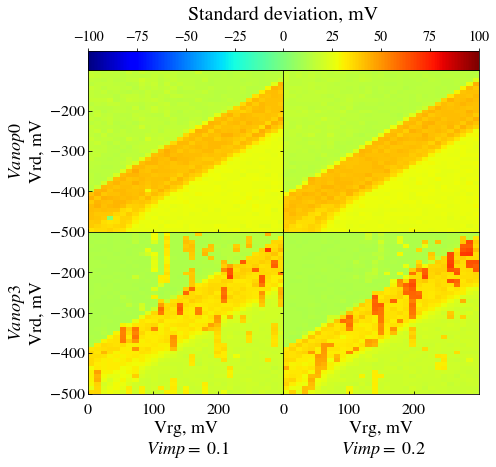

In [699]:
loop=1
Vmin =-0.1*1000
Vmax=0.1*1000

Vrg_tick = 1000*np.arange(min(Vrgs),max(Vrgs)+0.01,0.1)
Vrd_tick = 1000*np.arange(min(Vrds),max(Vrds)+0.01,0.1)

extent =  1000*min(Vrgs), 1000*max(Vrgs), 1000*min(Vrds), 1000*max(Vrds)


fig, axs = plt.subplots(nrows=2, ncols=2, sharex='all', sharey='all', figsize=(7,7), gridspec_kw={'hspace': 0.0, 'wspace': 0.0})


for i in [1,2]:
    Vimp=round(Vimps[i],1)
    X = 1000*Stds[(loop,Vimp)][0].T
    c = axs[0,i-1].imshow(X ,extent=extent, vmin=Vmin, vmax=Vmax,  cmap='jet', origin='lower', filternorm =True, aspect='auto',interpolation = None)
    Vimp=round(Vimps[i],1)
    X = 1000*Stds[(loop,Vimp)][1].T
    c = axs[1,i-1].imshow(X ,extent=extent, vmin=Vmin, vmax=Vmax,  cmap='jet', origin='lower', filternorm =True, aspect='auto',interpolation = None)
    axs[1,i-1].set_xlabel(f"Vrg, mV\n $Vimp =$ {Vimp}", fontsize = 18) 
    if i==1:
        axs[0,0].set_ylabel('$Vanop0$\nVrd, mV', fontsize = 18)
        axs[1,0].set_ylabel('$Vanop3$\nVrd, mV', fontsize = 18)
        


axs[0,0].tick_params(axis="y",direction="in")
axs[1,0].tick_params(axis="y",direction="in")

for ax in axs:
    for i in range(2):
        ax[i].tick_params(axis="x",direction="in", labelsize=16,  pad=10)


axs[0,0].tick_params(axis='y', labelsize=16)
axs[1,0].tick_params(axis='y', labelsize=16)
        
        
axs[1,1].set_xticks(Vrg_tick[:-1])   

axs[0,0].set_yticks(Vrd_tick[:-1])   
axs[1,0].set_yticks(Vrd_tick[:-1])   




cbar = fig.colorbar(c, ax=axs.ravel().tolist(), shrink=1, pad=-0.0, location = 'top')
cbar.set_label('Standard deviation, mV', rotation=0,fontsize = 20,labelpad=10)
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.tick_params(labelsize=14, axis='y', direction='in',pad=4)
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.tick_params(labelsize=14)

plt.savefig('Zero test: Standard deviation.pdf', format='pdf', bbox_inches="tight")        

        
plt.show()

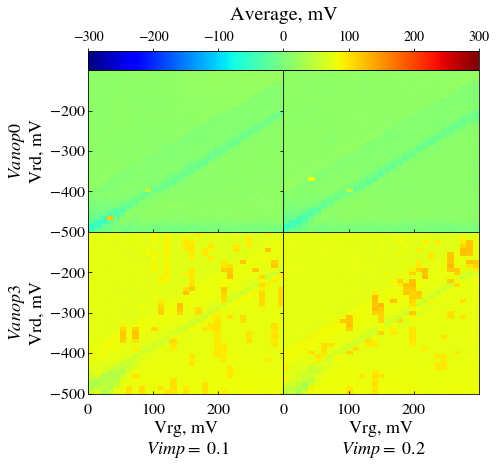

In [694]:
loop=1
Vmin =-0.3*1000
Vmax=0.3*1000

Vrg_tick = 1000*np.arange(min(Vrgs),max(Vrgs)+0.01,0.1)
Vrd_tick = 1000*np.arange(min(Vrds),max(Vrds)+0.01,0.1)

extent =  1000*min(Vrgs), 1000*max(Vrgs), 1000*min(Vrds), 1000*max(Vrds)


fig, axs = plt.subplots(nrows=2, ncols=2, sharex='all', sharey='all', figsize=(7,7), gridspec_kw={'hspace': 0.0, 'wspace': 0.0})


for i in [1,2]:
    Vimp=round(Vimps[i],1)
    X = 1000*Averages[(loop,Vimp)][0].T
    c = axs[0,i-1].imshow(X ,extent=extent, vmin=Vmin, vmax=Vmax,  cmap='jet', origin='lower', filternorm =True, aspect='auto',interpolation = None)
    Vimp=round(Vimps[i],1)
    X = 1000*Averages[(loop,Vimp)][1].T
    c = axs[1,i-1].imshow(X ,extent=extent, vmin=Vmin, vmax=Vmax,  cmap='jet', origin='lower', filternorm =True, aspect='auto',interpolation = None)
    axs[1,i-1].set_xlabel(f"Vrg, mV\n $Vimp =$ {Vimp}", fontsize = 18) 
    if i==1:
        axs[0,0].set_ylabel('$Vanop0$\nVrd, mV', fontsize = 18)
        axs[1,0].set_ylabel('$Vanop3$\nVrd, mV', fontsize = 18)
        


axs[0,0].tick_params(axis="y",direction="in")
axs[1,0].tick_params(axis="y",direction="in")

for ax in axs:
    for i in range(2):
        ax[i].tick_params(axis="x",direction="in", labelsize=16,  pad=10)


axs[0,0].tick_params(axis='y', labelsize=16)
axs[1,0].tick_params(axis='y', labelsize=16)
        
        
axs[1,1].set_xticks(Vrg_tick[:-1])   

axs[0,0].set_yticks(Vrd_tick[:-1])   
axs[1,0].set_yticks(Vrd_tick[:-1])   




cbar = fig.colorbar(c, ax=axs.ravel().tolist(), shrink=1, pad=-0.0, location = 'top')
cbar.set_label('Average, mV', rotation=0,fontsize = 20,labelpad=10)
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.tick_params(labelsize=14, axis='y', direction='in',pad=4)
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.tick_params(labelsize=14)

plt.savefig('Zero test: Average.pdf', format='pdf', bbox_inches="tight")        

        
plt.show()

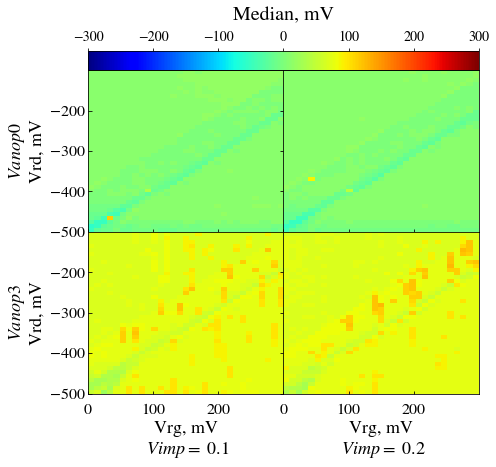

In [695]:
loop=1
Vmin =-0.3*1000
Vmax=0.3*1000

Vrg_tick = 1000*np.arange(min(Vrgs),max(Vrgs)+0.01,0.1)
Vrd_tick = 1000*np.arange(min(Vrds),max(Vrds)+0.01,0.1)

extent =  1000*min(Vrgs), 1000*max(Vrgs), 1000*min(Vrds), 1000*max(Vrds)


fig, axs = plt.subplots(nrows=2, ncols=2, sharex='all', sharey='all', figsize=(7,7), gridspec_kw={'hspace': 0.0, 'wspace': 0.0})


for i in [1,2]:
    Vimp=round(Vimps[i],1)
    X = 1000*Medians[(loop,Vimp)][0].T
    c = axs[0,i-1].imshow(X ,extent=extent, vmin=Vmin, vmax=Vmax,  cmap='jet', origin='lower', filternorm =True, aspect='auto',interpolation = None)
    Vimp=round(Vimps[i],1)
    X = 1000*Medians[(loop,Vimp)][1].T
    c = axs[1,i-1].imshow(X ,extent=extent, vmin=Vmin, vmax=Vmax,  cmap='jet', origin='lower', filternorm =True, aspect='auto',interpolation = None)
    axs[1,i-1].set_xlabel(f"Vrg, mV\n $Vimp =$ {Vimp}", fontsize = 18) 
    if i==1:
        axs[0,0].set_ylabel('$Vanop0$\nVrd, mV', fontsize = 18)
        axs[1,0].set_ylabel('$Vanop3$\nVrd, mV', fontsize = 18)
        


axs[0,0].tick_params(axis="y",direction="in")
axs[1,0].tick_params(axis="y",direction="in")

for ax in axs:
    for i in range(2):
        ax[i].tick_params(axis="x",direction="in", labelsize=16,  pad=10)


axs[0,0].tick_params(axis='y', labelsize=16)
axs[1,0].tick_params(axis='y', labelsize=16)
        
        
axs[1,1].set_xticks(Vrg_tick[:-1])   

axs[0,0].set_yticks(Vrd_tick[:-1])   
axs[1,0].set_yticks(Vrd_tick[:-1])   




cbar = fig.colorbar(c, ax=axs.ravel().tolist(), shrink=1, pad=-0.0, location = 'top')
cbar.set_label('Median, mV', rotation=0,fontsize = 20,labelpad=10)
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.tick_params(labelsize=14, axis='y', direction='in',pad=4)
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.tick_params(labelsize=14)

plt.savefig('Zero test: Median.pdf', format='pdf', bbox_inches="tight")        

        
plt.show()

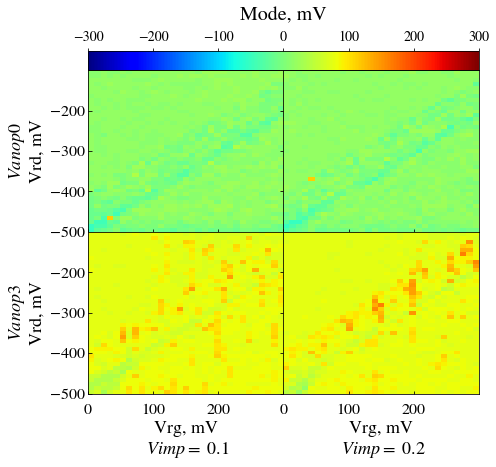

In [698]:
loop=1
Vmin =-0.3*1000
Vmax=0.3*1000

Vrg_tick = 1000*np.arange(min(Vrgs),max(Vrgs)+0.01,0.1)
Vrd_tick = 1000*np.arange(min(Vrds),max(Vrds)+0.01,0.1)

extent =  1000*min(Vrgs), 1000*max(Vrgs), 1000*min(Vrds), 1000*max(Vrds)


fig, axs = plt.subplots(nrows=2, ncols=2, sharex='all', sharey='all', figsize=(7,7), gridspec_kw={'hspace': 0.0, 'wspace': 0.0})


for i in [1,2]:
    Vimp=round(Vimps[i],1)
    X = 1000*Peaks[(loop,Vimp)][0].T
    c = axs[0,i-1].imshow(X ,extent=extent, vmin=Vmin, vmax=Vmax,  cmap='jet', origin='lower', filternorm =True, aspect='auto',interpolation = None)
    Vimp=round(Vimps[i],1)
    X=1000*Peaks[(loop,Vimp)][1].T
    c = axs[1,i-1].imshow(X ,extent=extent, vmin=Vmin, vmax=Vmax,  cmap='jet', origin='lower', filternorm =True, aspect='auto',interpolation = None)
    axs[1,i-1].set_xlabel(f"Vrg, mV\n $Vimp =$ {Vimp}", fontsize = 18) 
    if i==1:
        axs[0,0].set_ylabel('$Vanop0$\nVrd, mV', fontsize = 18)
        axs[1,0].set_ylabel('$Vanop3$\nVrd, mV', fontsize = 18)
        


axs[0,0].tick_params(axis="y",direction="in")
axs[1,0].tick_params(axis="y",direction="in")

for ax in axs:
    for i in range(2):
        ax[i].tick_params(axis="x",direction="in", labelsize=16,  pad=10)


axs[0,0].tick_params(axis='y', labelsize=16)
axs[1,0].tick_params(axis='y', labelsize=16)
        
        
axs[1,1].set_xticks(Vrg_tick[:-1])   

axs[0,0].set_yticks(Vrd_tick[:-1])   
axs[1,0].set_yticks(Vrd_tick[:-1])   




cbar = fig.colorbar(c, ax=axs.ravel().tolist(), shrink=1, pad=-0.0, location = 'top')
cbar.set_label('Mode, mV', rotation=0,fontsize = 20,labelpad=10)
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.tick_params(labelsize=14, axis='y', direction='in',pad=4)
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.tick_params(labelsize=14)

plt.savefig('Zero test: Mode.pdf', format='pdf', bbox_inches="tight")        

        
plt.show()

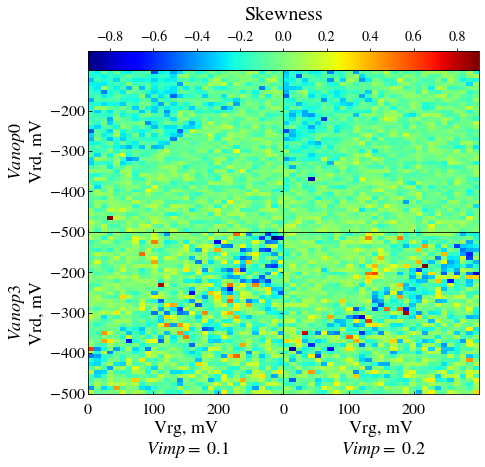

In [697]:
loop=1
Vmin =-0.9*1
Vmax=0.9*1

Vrg_tick = 1000*np.arange(min(Vrgs),max(Vrgs)+0.01,0.1)
Vrd_tick = 1000*np.arange(min(Vrds),max(Vrds)+0.01,0.1)

extent =  1000*min(Vrgs), 1000*max(Vrgs), 1000*min(Vrds), 1000*max(Vrds)


fig, axs = plt.subplots(nrows=2, ncols=2, sharex='all', sharey='all', figsize=(7,7), gridspec_kw={'hspace': 0.0, 'wspace': 0.0})


for i in [1,2]:
    Vimp=round(Vimps[i],1)
    X = 1*Skews[(loop,Vimp)][0].T
    c = axs[0,i-1].imshow(X ,extent=extent, vmin=Vmin, vmax=Vmax,  cmap='jet', origin='lower', filternorm =True, aspect='auto',interpolation = None)
    Vimp=round(Vimps[i],1)
    X=1*Skews[(loop,Vimp)][1].T
    c = axs[1,i-1].imshow(X ,extent=extent, vmin=Vmin, vmax=Vmax,  cmap='jet', origin='lower', filternorm =True, aspect='auto',interpolation = None)
    axs[1,i-1].set_xlabel(f"Vrg, mV\n $Vimp =$ {Vimp}", fontsize = 18) 
    if i==1:
        axs[0,0].set_ylabel('$Vanop0$\nVrd, mV', fontsize = 18)
        axs[1,0].set_ylabel('$Vanop3$\nVrd, mV', fontsize = 18)
        


axs[0,0].tick_params(axis="y",direction="in")
axs[1,0].tick_params(axis="y",direction="in")

for ax in axs:
    for i in range(2):
        ax[i].tick_params(axis="x",direction="in", labelsize=16,  pad=10)


axs[0,0].tick_params(axis='y', labelsize=16)
axs[1,0].tick_params(axis='y', labelsize=16)
        
        
axs[1,1].set_xticks(Vrg_tick[:-1])   

axs[0,0].set_yticks(Vrd_tick[:-1])   
axs[1,0].set_yticks(Vrd_tick[:-1])   




cbar = fig.colorbar(c, ax=axs.ravel().tolist(), shrink=1, pad=-0.0, location = 'top')
cbar.set_label('Skewness', rotation=0,fontsize = 20,labelpad=10)
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.tick_params(labelsize=14, axis='y', direction='in',pad=4)
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.tick_params(labelsize=14)

plt.savefig('Zero test: Skews.pdf', format='pdf', bbox_inches="tight")        

        
plt.show()

# Load the Data [Injection Test (sweep vrd and vrd)]

In [700]:
# Load data


hdf = 'eqrun_gini_210801'
session_num =   17927264

results = load_db( session_num, hdf+'.h5')
sw = results.df_meta['swept_params']

#results.df_meta.info()
###############################################
print(' ')
print(results.df_meta['static_params'][0])
print(' ')
print(results.df.info())
print(' ')
print(sw.values[0])
print(' ')
print(results.df.columns)

df = results.df

df.head()

...reading 17927264 from dbfile: ../../../Dropbox (Equal1)/eqrun_data/hdf/eqrun_gini_210801.h5
DONE
 
Description=inject test on QEC 207 , python_file=Fundamental_Qexp.ipynb , sn=A2 , loop=1 , sqf_file=inject_test.sqf , adc_channel=ch0 ch3 ch4 ch7 , nsamples=1000 , bin_width=0.01 , bin_range=half , 
 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5307696 entries, 0 to 5307695
Data columns (total 28 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   Vrd                      float64       
 1   Vrg                      float64       
 2   Vimp                     float64       
 3   cdac_aID2                float64       
 4   cdac_aID5                float64       
 5   cdac_aIU2                float64       
 6   cdac_aIU5                float64       
 7   loop                     float64       
 8   nsamples                 float64       
 9   bin_width                float64       
 10  testnum                  int64         

,Vrd,Vrg,Vimp,cdac_aID2,cdac_aID5,cdac_aIU2,cdac_aIU5,loop,nsamples,bin_width,...,Vanop3_avg,Vanop3_std,Vanop4_hist,Vanop4_avg,Vanop4_std,Vanop7_hist,Vanop7_avg,Vanop7_std,session_id,testtime
0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.0,0.01,...,0.057877,0.020563,0.0,-0.203966,0.039098,0.0,-0.062575,0.093369,17927264,2021-08-04 22:28:02.041295
1,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.0,0.01,...,0.057877,0.020563,0.0,-0.203966,0.039098,0.0,-0.062575,0.093369,17927264,2021-08-04 22:28:02.041295
2,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.0,0.01,...,0.057877,0.020563,0.0,-0.203966,0.039098,0.0,-0.062575,0.093369,17927264,2021-08-04 22:28:02.041295
3,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.0,0.01,...,0.057877,0.020563,0.0,-0.203966,0.039098,0.0,-0.062575,0.093369,17927264,2021-08-04 22:28:02.041295
4,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1000.0,0.01,...,0.057877,0.020563,0.0,-0.203966,0.039098,0.0,-0.062575,0.093369,17927264,2021-08-04 22:28:02.041295


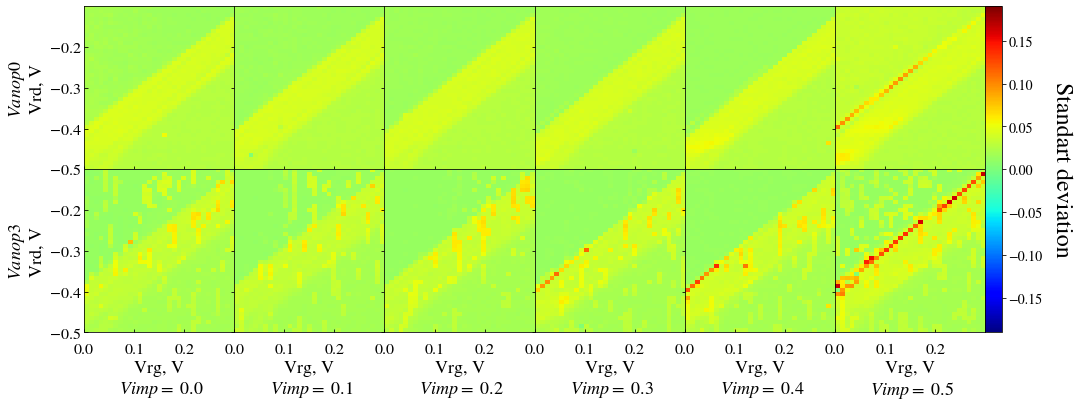

In [701]:
loop=1
Vmin =-0.19
Vmax=0.19

Vrg_tick = np.arange(min(Vrgs),max(Vrgs)+0.01,0.1)
Vrd_tick = np.arange(min(Vrds),max(Vrds)+0.01,0.1)

extent =  min(Vrgs), max(Vrgs), min(Vrds), max(Vrds)
# fig = plt.figure()
# gs = fig.add_gridspec(3,2, hspace=0, wspace=0)
# axs = gs.subplots(sharex=True, sharey=True)

fig, axs = plt.subplots(nrows=2, ncols=6, sharex='all', sharey='all', figsize=(19,6), gridspec_kw={'hspace': 0.0, 'wspace': 0.0})
# adjust the amount of width reserved for space between subplots
# plt.subplots_adjust(wspace=0.05,hspace=0.5)
# fig.suptitle('Main title',fontsize = 18)

for i in range(len(Vimps)):
    Vimp=round(Vimps[i],1)
    X = Stds[(loop,Vimp)][0].T
    c = axs[0,i].imshow(X ,extent=extent, vmin=Vmin, vmax=Vmax,  cmap='jet', origin='lower', filternorm =True, aspect='auto',interpolation = None)
    Vimp=round(Vimps[i],1)
    X = Stds[(loop,Vimp)][1].T
    c = axs[1,i].imshow(X ,extent=extent, vmin=Vmin, vmax=Vmax,  cmap='jet', origin='lower', filternorm =True, aspect='auto',interpolation = None)
    axs[1,i].set_xlabel(f"Vrg, V\n $Vimp =$ {Vimp}", fontsize = 18) 
    if i==0:
        axs[0,0].set_ylabel('$Vanop0$\nVrd, V', fontsize = 18)
        axs[1,0].set_ylabel('$Vanop3$\nVrd, V', fontsize = 18)
        


axs[0,0].tick_params(axis="y",direction="in")
axs[1,0].tick_params(axis="y",direction="in")

for ax in axs:
    for i in range(6):
        ax[i].tick_params(axis="x",direction="in", labelsize=16,  pad=10)


axs[0,0].tick_params(axis='y', labelsize=16)
axs[1,0].tick_params(axis='y', labelsize=16)
        
        
axs[1,5].set_xticks(Vrg_tick[:-1])   

axs[0,0].set_yticks(Vrd_tick[:-1])   
axs[1,0].set_yticks(Vrd_tick[:-1])   





#https://jdhao.github.io/2017/06/11/mpl_multiplot_one_colorbar/
cbar = fig.colorbar(c, ax=axs.ravel().tolist(), shrink=1,pad=0.00, orientation="vertical")
cbar.set_label('Standart deviation', rotation=270,fontsize = 24,labelpad=30)
# cbar.set_label('Skewness', rotation=270,fontsize = 24,labelpad=30)
# cbar.set_label('Average', rotation=270,fontsize = 24,labelpad=30)
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.tick_params(labelsize=14)
# cbar.ax.set_yticklabels(ticklabs,ha='right')
# cbar.ax.yaxis.set_tick_params(pad=0) 
plt.savefig('Averages.png', format='png',dpi=600, bbox_inches="tight")        

        
plt.show()

In [702]:
varColumn=sw.values[0]
varColumn=varColumn.replace(' ', '')
varColumn=varColumn.split(',')

cols2Leave = [c.split('=')[0] for c in varColumn[:-1]]
cols2Leave.extend(['Vanop','Vanop0_hist', 'Vanop3_hist','Vanop4_hist','Vanop7_hist'])

data = results.df[cols2Leave ]

data.head()

,Vrd,Vrg,Vimp,cdac_aID2,cdac_aID5,cdac_aIU2,cdac_aIU5,Vanop,Vanop0_hist,Vanop3_hist,Vanop4_hist,Vanop7_hist
0,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,-0.407090,0.0,0.0,0.0,0.0
1,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,-0.399652,0.0,0.0,0.0,0.0
2,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,-0.392213,0.0,0.0,0.0,0.0
3,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,-0.384775,0.0,0.0,0.0,0.0
4,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,-0.377336,0.0,0.0,0.0,0.0


In [703]:
# important for sorting procedure.  0.3 sometimes 0.3000000002
data["Vrd"] = data["Vrd"].apply(lambda x: round(x,2))
data["Vrg"] = data["Vrg"].apply(lambda x: round(x,2))
data["cdac_aID2"] = data["cdac_aID2"].apply(lambda x: round(x))

grouped = data.groupby(['cdac_aIU2','Vimp','Vrg','Vrd']) 


Vanops  = np.unique((data.Vanop))
Vimps  = np.unique((data.Vimp))
Vrds  = np.unique((data.Vrd))
Vrgs  = np.unique((data.Vrg))
cdac_aIU2s = np.unique((data.cdac_aIU2))

Nbins = len(np.unique((df['Vanop']))) 

Nsamples = 1000

<ipython-input-703-2113ed4cca74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Vrd"] = data["Vrd"].apply(lambda x: round(x,2))
<ipython-input-703-2113ed4cca74>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Vrg"] = data["Vrg"].apply(lambda x: round(x,2))
<ipython-input-703-2113ed4cca74>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [704]:
# # subData = data[(data["cdac_aIU2"] == 0) & (data["Vimp"] == 0)& (data["Vrg"] == 0)& (data["Vrd"] == -0.43)]
# subData = data[data["Vrd"] == -0.46]
# subData.Vrd

In [705]:
Averages = {}
Stds = {}
Peaks = {}
Medians = {}
Skews = {}

th=10

for cdac_aIU2 in cdac_aIU2s:
    print(cdac_aIU2)
    for Vimp in Vimps:
        print(Vimp)
        avg0 = np.zeros((len(Vrgs),len(Vrds)))
        avg3 = np.zeros((len(Vrgs),len(Vrds)))
        avg4 = np.zeros((len(Vrgs),len(Vrds)))
        avg7 = np.zeros((len(Vrgs),len(Vrds)))
        
        std0 = np.zeros((len(Vrgs),len(Vrds)))
        std3 = np.zeros((len(Vrgs),len(Vrds)))
        std4 = np.zeros((len(Vrgs),len(Vrds)))
        std7 = np.zeros((len(Vrgs),len(Vrds)))
        
        peak0 = np.zeros((len(Vrgs),len(Vrds)))
        peak3 = np.zeros((len(Vrgs),len(Vrds)))
        peak4 = np.zeros((len(Vrgs),len(Vrds)))
        peak7 = np.zeros((len(Vrgs),len(Vrds)))
        
        med0 = np.zeros((len(Vrgs),len(Vrds)))
        med3 = np.zeros((len(Vrgs),len(Vrds)))
        med4 = np.zeros((len(Vrgs),len(Vrds)))
        med7 = np.zeros((len(Vrgs),len(Vrds)))
        
        skw0 = np.zeros((len(Vrgs),len(Vrds)))
        skw3 = np.zeros((len(Vrgs),len(Vrds)))
        skw4 = np.zeros((len(Vrgs),len(Vrds)))
        skw7 = np.zeros((len(Vrgs),len(Vrds)))
        for i in range(len(Vrgs)):
            for j in range(len(Vrds)):
                Vrg = Vrgs[i]
                Vrd = Vrds[j]
                data2process = grouped.get_group((cdac_aIU2,Vimp,Vrg,Vrd))
                #data2process=data[(data["cdac_aIU2"] == cdac_aIU2) & (data["Vimp"] == Vimp)& (data["Vrg"] == Vrg)& (data["Vrd"] == Vrd)]
                x=data2process.Vanop
                y0=data2process.Vanop0_hist
                y3=data2process.Vanop3_hist
                y4=data2process.Vanop4_hist
                y7=data2process.Vanop7_hist
                avg0[i,j], avg3[i,j], avg4[i,j], avg7[i,j] = getAvg(x,y0,threshold=th),getAvg(x,y3,threshold=th),getAvg(x,y4,threshold=th),getAvg(x,y7,threshold=th)
                std0[i,j], std3[i,j], std4[i,j], std7[i,j] = getStd(x,y0,threshold=th),getStd(x,y3,threshold=th),getStd(x,y4,threshold=th),getStd(x,y7,threshold=th)
                peak0[i,j], peak3[i,j], peak4[i,j], peak7[i,j] = getPeak(x,y0),getPeak(x,y3),getPeak(x,y4),getPeak(x,y7)
                med0[i,j], med3[i,j], med4[i,j], med7[i,j] = getMedian(x,y0),getMedian(x,y3),getMedian(x,y4),getMedian(x,y7)
                skw0[i,j], skw3[i,j], skw4[i,j], skw7[i,j] = getSkew(x,y0,threshold=th),getSkew(x,y3,threshold=th),getSkew(x,y4,threshold=th),getSkew(x,y7,threshold=th)

        Averages[(cdac_aIU2,round(Vimp,1))] = [avg0,avg3,avg4,avg7]
        Stds[(cdac_aIU2,round(Vimp,1))]     = [std0,std3,std4,std7]
        Peaks[(cdac_aIU2,round(Vimp,1))]    = [peak0,peak3,peak4,peak7]
        Medians[(cdac_aIU2,round(Vimp,1))]  = [med0,med3,med4,med7]
        Skews[(cdac_aIU2,round(Vimp,1))]    = [skw0,skw3,skw4,skw7]
                
        
    

0.0
0.0
0.1
0.2
0.30000000000000004
0.4
0.5
50.0
0.0
0.1
0.2
0.30000000000000004
0.4
0.5
100.0
0.0
0.1
0.2
0.30000000000000004
0.4
0.5
150.0
0.0
0.1
0.2
0.30000000000000004
0.4
0.5
200.0
0.0
0.1
0.2
0.30000000000000004
0.4
0.5
250.0
0.0
0.1
0.2
0.30000000000000004
0.4
0.5


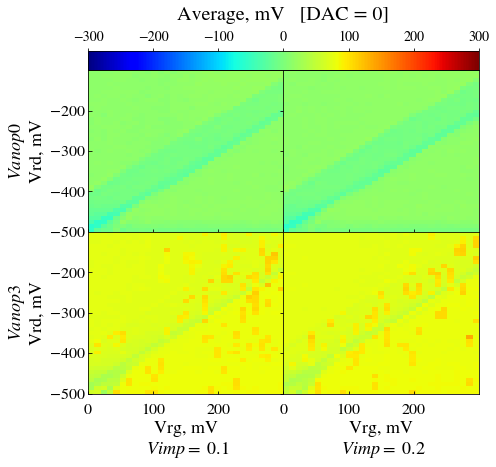

In [711]:
cdac_aIU2=0
Vmin =-0.3*1000
Vmax=0.3*1000

Vrg_tick = 1000*np.arange(min(Vrgs),max(Vrgs)+0.01,0.1)
Vrd_tick = 1000*np.arange(min(Vrds),max(Vrds)+0.01,0.1)

extent =  1000*min(Vrgs), 1000*max(Vrgs), 1000*min(Vrds), 1000*max(Vrds)


fig, axs = plt.subplots(nrows=2, ncols=2, sharex='all', sharey='all', figsize=(7,7), gridspec_kw={'hspace': 0.0, 'wspace': 0.0})



med=1

for i in [1,2]:
    Vimp=round(Vimps[i],1)
    X = sp.ndimage.filters.median_filter(Averages[(cdac_aIU2,Vimp)][0], (med,med), mode='nearest').T
    c = axs[0,i-1].imshow(1000*X ,extent=extent, vmin=Vmin, vmax=Vmax,  cmap='jet', origin='lower', filternorm =True, aspect='auto',interpolation = None)
    Vimp=round(Vimps[i],1)
    X = sp.ndimage.filters.median_filter(Averages[(cdac_aIU2,Vimp)][1], (med,med), mode='nearest').T
    c = axs[1,i-1].imshow(1000*X ,extent=extent, vmin=Vmin, vmax=Vmax,  cmap='jet', origin='lower', filternorm =True, aspect='auto',interpolation = None)
    axs[1,i-1].set_xlabel(f"Vrg, mV\n $Vimp =$ {Vimp}", fontsize = 18) 
    if i==1:
        axs[0,0].set_ylabel('$Vanop0$\nVrd, mV', fontsize = 18)
        axs[1,0].set_ylabel('$Vanop3$\nVrd, mV', fontsize = 18)
        


axs[0,0].tick_params(axis="y",direction="in")
axs[1,0].tick_params(axis="y",direction="in")

for ax in axs:
    for i in range(2):
        ax[i].tick_params(axis="x",direction="in", labelsize=16,  pad=10)


axs[0,0].tick_params(axis='y', labelsize=16)
axs[1,0].tick_params(axis='y', labelsize=16)
        
        
axs[1,1].set_xticks(Vrg_tick[:-1])   

axs[0,0].set_yticks(Vrd_tick[:-1])   
axs[1,0].set_yticks(Vrd_tick[:-1])   




cbar = fig.colorbar(c, ax=axs.ravel().tolist(), shrink=1, pad=-0.0, location = 'top')
cbar.set_label(f'Average, mV   [DAC = {cdac_aIU2}]', rotation=0,fontsize = 20,labelpad=10)
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.tick_params(labelsize=14, axis='y', direction='in',pad=4)
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.tick_params(labelsize=14)

plt.savefig(f'Average [DAC={cdac_aIU2}].pdf', format='pdf', bbox_inches="tight")        

        
plt.show()

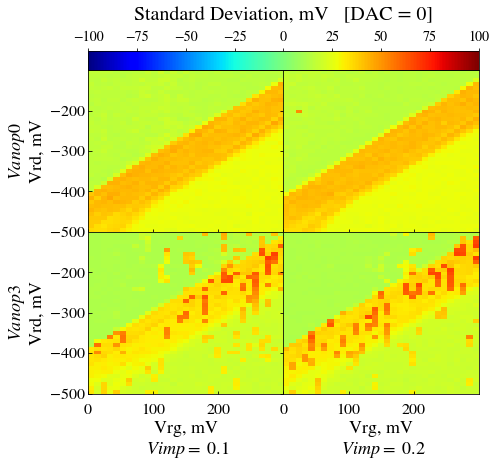

In [714]:
cdac_aIU2=0
Vmin =-0.1*1000
Vmax=0.1*1000

Vrg_tick = 1000*np.arange(min(Vrgs),max(Vrgs)+0.01,0.1)
Vrd_tick = 1000*np.arange(min(Vrds),max(Vrds)+0.01,0.1)

extent =  1000*min(Vrgs), 1000*max(Vrgs), 1000*min(Vrds), 1000*max(Vrds)


fig, axs = plt.subplots(nrows=2, ncols=2, sharex='all', sharey='all', figsize=(7,7), gridspec_kw={'hspace': 0.0, 'wspace': 0.0})



med=1

for i in [1,2]:
    Vimp=round(Vimps[i],1)
    X = sp.ndimage.filters.median_filter(Stds[(cdac_aIU2,Vimp)][0], (med,med), mode='nearest').T
    c = axs[0,i-1].imshow(1000*X ,extent=extent, vmin=Vmin, vmax=Vmax,  cmap='jet', origin='lower', filternorm =True, aspect='auto',interpolation = None)
    Vimp=round(Vimps[i],1)
    X = sp.ndimage.filters.median_filter(Stds[(cdac_aIU2,Vimp)][1], (med,med), mode='nearest').T
    c = axs[1,i-1].imshow(1000*X ,extent=extent, vmin=Vmin, vmax=Vmax,  cmap='jet', origin='lower', filternorm =True, aspect='auto',interpolation = None)
    axs[1,i-1].set_xlabel(f"Vrg, mV\n $Vimp =$ {Vimp}", fontsize = 18) 
    if i==1:
        axs[0,0].set_ylabel('$Vanop0$\nVrd, mV', fontsize = 18)
        axs[1,0].set_ylabel('$Vanop3$\nVrd, mV', fontsize = 18)
        


axs[0,0].tick_params(axis="y",direction="in")
axs[1,0].tick_params(axis="y",direction="in")

for ax in axs:
    for i in range(2):
        ax[i].tick_params(axis="x",direction="in", labelsize=16,  pad=10)


axs[0,0].tick_params(axis='y', labelsize=16)
axs[1,0].tick_params(axis='y', labelsize=16)
        
        
axs[1,1].set_xticks(Vrg_tick[:-1])   

axs[0,0].set_yticks(Vrd_tick[:-1])   
axs[1,0].set_yticks(Vrd_tick[:-1])   




cbar = fig.colorbar(c, ax=axs.ravel().tolist(), shrink=1, pad=-0.0, location = 'top')
cbar.set_label(f'Standard Deviation, mV   [DAC = {cdac_aIU2}]', rotation=0,fontsize = 20,labelpad=10)
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.tick_params(labelsize=14, axis='y', direction='in',pad=4)
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.tick_params(labelsize=14)

plt.savefig(f'Standard Deviation [DAC={cdac_aIU2}].pdf', format='pdf', bbox_inches="tight")        

        
plt.show()

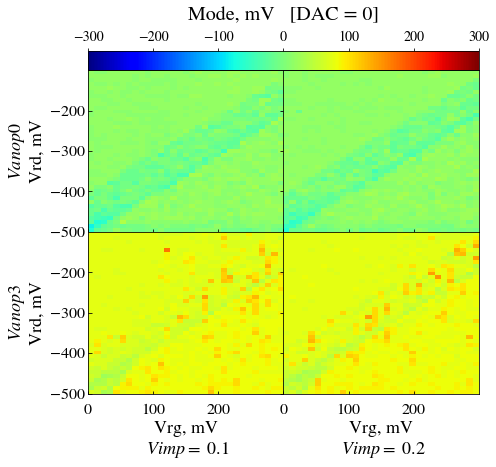

In [717]:
cdac_aIU2=0
Vmin =-0.3*1000
Vmax=0.3*1000

Vrg_tick = 1000*np.arange(min(Vrgs),max(Vrgs)+0.01,0.1)
Vrd_tick = 1000*np.arange(min(Vrds),max(Vrds)+0.01,0.1)

extent =  1000*min(Vrgs), 1000*max(Vrgs), 1000*min(Vrds), 1000*max(Vrds)


fig, axs = plt.subplots(nrows=2, ncols=2, sharex='all', sharey='all', figsize=(7,7), gridspec_kw={'hspace': 0.0, 'wspace': 0.0})



med=1

for i in [1,2]:
    Vimp=round(Vimps[i],1)
    X = sp.ndimage.filters.median_filter(Peaks[(cdac_aIU2,Vimp)][0], (med,med), mode='nearest').T
    c = axs[0,i-1].imshow(1000*X ,extent=extent, vmin=Vmin, vmax=Vmax,  cmap='jet', origin='lower', filternorm =True, aspect='auto',interpolation = None)
    Vimp=round(Vimps[i],1)
    X = sp.ndimage.filters.median_filter(Peaks[(cdac_aIU2,Vimp)][1], (med,med), mode='nearest').T
    c = axs[1,i-1].imshow(1000*X ,extent=extent, vmin=Vmin, vmax=Vmax,  cmap='jet', origin='lower', filternorm =True, aspect='auto',interpolation = None)
    axs[1,i-1].set_xlabel(f"Vrg, mV\n $Vimp =$ {Vimp}", fontsize = 18) 
    if i==1:
        axs[0,0].set_ylabel('$Vanop0$\nVrd, mV', fontsize = 18)
        axs[1,0].set_ylabel('$Vanop3$\nVrd, mV', fontsize = 18)
        


axs[0,0].tick_params(axis="y",direction="in")
axs[1,0].tick_params(axis="y",direction="in")

for ax in axs:
    for i in range(2):
        ax[i].tick_params(axis="x",direction="in", labelsize=16,  pad=10)


axs[0,0].tick_params(axis='y', labelsize=16)
axs[1,0].tick_params(axis='y', labelsize=16)
        
        
axs[1,1].set_xticks(Vrg_tick[:-1])   

axs[0,0].set_yticks(Vrd_tick[:-1])   
axs[1,0].set_yticks(Vrd_tick[:-1])   




cbar = fig.colorbar(c, ax=axs.ravel().tolist(), shrink=1, pad=-0.0, location = 'top')
cbar.set_label(f'Mode, mV   [DAC = {cdac_aIU2}]', rotation=0,fontsize = 20,labelpad=10)
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.tick_params(labelsize=14, axis='y', direction='in',pad=4)
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.tick_params(labelsize=14)

plt.savefig(f'Mode [DAC={cdac_aIU2}].pdf', format='pdf', bbox_inches="tight")        

        
plt.show()

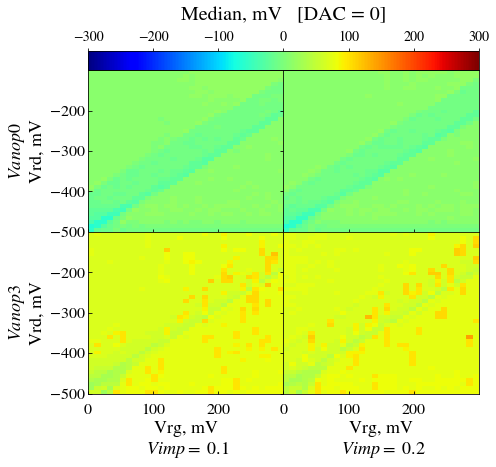

In [720]:
cdac_aIU2=0
Vmin =-0.3*1000
Vmax=0.3*1000

Vrg_tick = 1000*np.arange(min(Vrgs),max(Vrgs)+0.01,0.1)
Vrd_tick = 1000*np.arange(min(Vrds),max(Vrds)+0.01,0.1)

extent =  1000*min(Vrgs), 1000*max(Vrgs), 1000*min(Vrds), 1000*max(Vrds)


fig, axs = plt.subplots(nrows=2, ncols=2, sharex='all', sharey='all', figsize=(7,7), gridspec_kw={'hspace': 0.0, 'wspace': 0.0})



med=1

for i in [1,2]:
    Vimp=round(Vimps[i],1)
    X = sp.ndimage.filters.median_filter(Medians[(cdac_aIU2,Vimp)][0], (med,med), mode='nearest').T
    c = axs[0,i-1].imshow(1000*X ,extent=extent, vmin=Vmin, vmax=Vmax,  cmap='jet', origin='lower', filternorm =True, aspect='auto',interpolation = None)
    Vimp=round(Vimps[i],1)
    X = sp.ndimage.filters.median_filter(Medians[(cdac_aIU2,Vimp)][1], (med,med), mode='nearest').T
    c = axs[1,i-1].imshow(1000*X ,extent=extent, vmin=Vmin, vmax=Vmax,  cmap='jet', origin='lower', filternorm =True, aspect='auto',interpolation = None)
    axs[1,i-1].set_xlabel(f"Vrg, mV\n $Vimp =$ {Vimp}", fontsize = 18) 
    if i==1:
        axs[0,0].set_ylabel('$Vanop0$\nVrd, mV', fontsize = 18)
        axs[1,0].set_ylabel('$Vanop3$\nVrd, mV', fontsize = 18)
        


axs[0,0].tick_params(axis="y",direction="in")
axs[1,0].tick_params(axis="y",direction="in")

for ax in axs:
    for i in range(2):
        ax[i].tick_params(axis="x",direction="in", labelsize=16,  pad=10)


axs[0,0].tick_params(axis='y', labelsize=16)
axs[1,0].tick_params(axis='y', labelsize=16)
        
        
axs[1,1].set_xticks(Vrg_tick[:-1])   

axs[0,0].set_yticks(Vrd_tick[:-1])   
axs[1,0].set_yticks(Vrd_tick[:-1])   




cbar = fig.colorbar(c, ax=axs.ravel().tolist(), shrink=1, pad=-0.0, location = 'top')
cbar.set_label(f'Median, mV   [DAC = {cdac_aIU2}]', rotation=0,fontsize = 20,labelpad=10)
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.tick_params(labelsize=14, axis='y', direction='in',pad=4)
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.tick_params(labelsize=14)

plt.savefig(f'Median [DAC={cdac_aIU2}].pdf', format='pdf', bbox_inches="tight")        

        
plt.show()

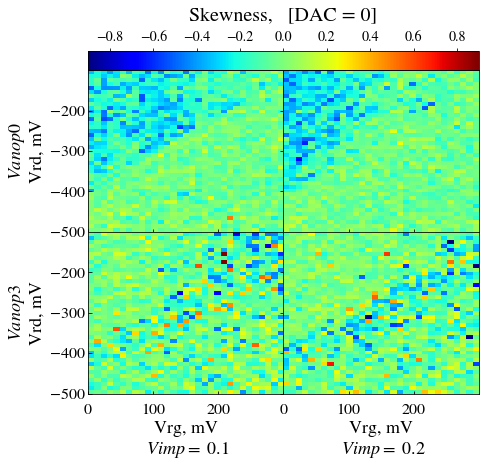

In [723]:
cdac_aIU2=0
Vmin =-0.9*1
Vmax=0.9*1

Vrg_tick = 1000*np.arange(min(Vrgs),max(Vrgs)+0.01,0.1)
Vrd_tick = 1000*np.arange(min(Vrds),max(Vrds)+0.01,0.1)

extent =  1000*min(Vrgs), 1000*max(Vrgs), 1000*min(Vrds), 1000*max(Vrds)


fig, axs = plt.subplots(nrows=2, ncols=2, sharex='all', sharey='all', figsize=(7,7), gridspec_kw={'hspace': 0.0, 'wspace': 0.0})



med=1

for i in [1,2]:
    Vimp=round(Vimps[i],1)
    X = sp.ndimage.filters.median_filter(Skews[(cdac_aIU2,Vimp)][0], (med,med), mode='nearest').T
    c = axs[0,i-1].imshow(1*X ,extent=extent, vmin=Vmin, vmax=Vmax,  cmap='jet', origin='lower', filternorm =True, aspect='auto',interpolation = None)
    Vimp=round(Vimps[i],1)
    X = sp.ndimage.filters.median_filter(Skews[(cdac_aIU2,Vimp)][1], (med,med), mode='nearest').T
    c = axs[1,i-1].imshow(1*X ,extent=extent, vmin=Vmin, vmax=Vmax,  cmap='jet', origin='lower', filternorm =True, aspect='auto',interpolation = None)
    axs[1,i-1].set_xlabel(f"Vrg, mV\n $Vimp =$ {Vimp}", fontsize = 18) 
    if i==1:
        axs[0,0].set_ylabel('$Vanop0$\nVrd, mV', fontsize = 18)
        axs[1,0].set_ylabel('$Vanop3$\nVrd, mV', fontsize = 18)
        


axs[0,0].tick_params(axis="y",direction="in")
axs[1,0].tick_params(axis="y",direction="in")

for ax in axs:
    for i in range(2):
        ax[i].tick_params(axis="x",direction="in", labelsize=16,  pad=10)


axs[0,0].tick_params(axis='y', labelsize=16)
axs[1,0].tick_params(axis='y', labelsize=16)
        
        
axs[1,1].set_xticks(Vrg_tick[:-1])   

axs[0,0].set_yticks(Vrd_tick[:-1])   
axs[1,0].set_yticks(Vrd_tick[:-1])   




cbar = fig.colorbar(c, ax=axs.ravel().tolist(), shrink=1, pad=-0.0, location = 'top')
cbar.set_label(f'Skewness,   [DAC = {cdac_aIU2}]', rotation=0,fontsize = 20,labelpad=10)
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.tick_params(labelsize=14, axis='y', direction='in',pad=4)
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.tick_params(labelsize=14)

plt.savefig(f'Skewness [DAC={cdac_aIU2}].pdf', format='pdf', bbox_inches="tight")        

        
plt.show()

# Time Series

In [4]:
data = pd.read_csv('Injection-Test_1-cdac-step_time-series_gini.csv')

In [5]:
data.head()

,Unnamed: 0,Vrd,Vrg,Vimp,cdac_aIU2,adc_count,Vanop0_adc_data,Vanop3_adc_data,sqf_define_pdelay
0,0,-0.3,0.09,-0.2,0.0,0.0,0.000000,0.109549,4.0
1,1,-0.3,0.09,-0.2,0.0,1.0,0.012848,0.074385,4.0
2,2,-0.3,0.09,-0.2,0.0,2.0,-0.000676,0.071004,4.0
3,3,-0.3,0.09,-0.2,0.0,3.0,-0.006086,0.064242,4.0
4,4,-0.3,0.09,-0.2,0.0,4.0,0.004734,0.099406,4.0


In [6]:
# important for sorting procedure.  0.3 sometimes 0.3000000002

data["Vrg"] = data["Vrg"].apply(lambda x: round(x,3))
data["Vimp"] = data["Vimp"].apply(lambda x: round(x,1))
# data["cdac_aIU2"] = data["cdac_aIU2"].apply(lambda x: round(x))


In [7]:
grouped = data.groupby(['sqf_define_pdelay','cdac_aIU2','Vimp','Vrg']) 



Vimps  = np.unique((data.Vimp))
Vrgs  = np.unique((data.Vrg))
sqf_define_pdelays  = np.unique((data.sqf_define_pdelay))
cdac_aIU2s = np.unique((data.cdac_aIU2))





Vimp  0.2
Vrg  0.121
cdac_aIU2 32.0


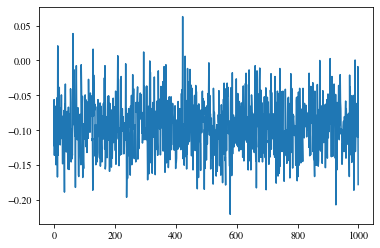

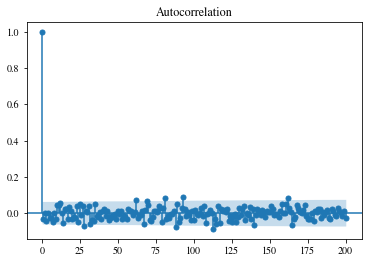

In [9]:
cdac_aIU2=cdac_aIU2s[32]
Vimp=Vimps[4]
Vrg=Vrgs[31]

sub =grouped.get_group((29,cdac_aIU2,Vimp,Vrg))

print('Vimp ',Vimp)
print('Vrg ',Vrg)

print('cdac_aIU2',cdac_aIU2)

Y = np.array(sub.Vanop0_adc_data)

_=plt.plot(Y)

_=plot_acf(Y, lags = 200)

In [920]:
mode(Y)[0][0]

-0.0757377049180327

In [8]:
Averages = {}
Stds = {}
Peaks = {}
Medians = {}
Skews = {}


for T in sqf_define_pdelays:
    print(T)
    for Vimp in Vimps:
        print(Vimp)
        avg0 = np.zeros((len(Vrgs),len(cdac_aIU2s)))
        avg3 = np.zeros((len(Vrgs),len(cdac_aIU2s)))
        avg4 = np.zeros((len(Vrgs),len(cdac_aIU2s)))
        avg7 = np.zeros((len(Vrgs),len(cdac_aIU2s)))
        
        std0 = np.zeros((len(Vrgs),len(cdac_aIU2s)))
        std3 = np.zeros((len(Vrgs),len(cdac_aIU2s)))
        std4 = np.zeros((len(Vrgs),len(cdac_aIU2s)))
        std7 = np.zeros((len(Vrgs),len(cdac_aIU2s)))
        
        peak0 = np.zeros((len(Vrgs),len(cdac_aIU2s)))
        peak3 = np.zeros((len(Vrgs),len(cdac_aIU2s)))
        peak4 = np.zeros((len(Vrgs),len(cdac_aIU2s)))
        peak7 = np.zeros((len(Vrgs),len(cdac_aIU2s)))
        
        med0 = np.zeros((len(Vrgs),len(cdac_aIU2s)))
        med3 = np.zeros((len(Vrgs),len(cdac_aIU2s)))
        med4 = np.zeros((len(Vrgs),len(cdac_aIU2s)))
        med7 = np.zeros((len(Vrgs),len(cdac_aIU2s)))
        
        skw0 = np.zeros((len(Vrgs),len(cdac_aIU2s)))
        skw3 = np.zeros((len(Vrgs),len(cdac_aIU2s)))
        skw4 = np.zeros((len(Vrgs),len(cdac_aIU2s)))
        skw7 = np.zeros((len(Vrgs),len(cdac_aIU2s)))
        for i in range(len(Vrgs)):
            for j in range(len(cdac_aIU2s)): 
                Vrg = Vrgs[i]
                cdac_aIU2 = cdac_aIU2s[j]
                data2process = grouped.get_group((T,cdac_aIU2,Vimp,Vrg))
                y0=data2process.Vanop0_adc_data
                y3=data2process.Vanop3_adc_data

                avg0[i,j], avg3[i,j]   = np.mean(y0), np.mean(y3)
                std0[i,j], std3[i,j]   = np.std(y0), np.std(y3)
                peak0[i,j], peak3[i,j] = mode(y0)[0][0], mode(y3)[0][0]
                med0[i,j], med3[i,j]   = np.median(y0), np.median(y3)
                skw0[i,j], skw3[i,j]   = skew(y0), skew(y3)
        Averages[(T,round(Vimp,1))] = [avg0,avg3,avg4,avg7]
        Stds[(T,round(Vimp,1))]     = [std0,std3,std4,std7]
        Peaks[(T,round(Vimp,1))]    = [peak0,peak3,peak4,peak7]
        Medians[(T,round(Vimp,1))]  = [med0,med3,med4,med7]
        Skews[(T,round(Vimp,1))]    = [skw0,skw3,skw4,skw7]
                
        
    
import pickle
a_file = open("Averages.pkl", "wb")
pickle.dump(Averages, a_file)
a_file.close()
a_file = open("Stds.pkl", "wb")
pickle.dump(Stds, a_file)
a_file.close()
a_file = open("Peaks.pkl", "wb")
pickle.dump(Peaks, a_file)
a_file.close()
a_file = open("Medians.pkl", "wb")
pickle.dump(Medians, a_file)
a_file.close()
a_file = open("Skews.pkl", "wb")
pickle.dump(Skews, a_file)
a_file.close()

4.0
-0.2
-0.1
0.0
0.1
0.2
0.3
0.4
29.0
-0.2
-0.1
0.0
0.1
0.2
0.3
0.4


In [43]:
import pickle
a_file = open("Averages.pkl", "rb")
Averages = pickle.load(a_file)
a_file.close()
a_file = open("Stds.pkl", "rb")
Stds = pickle.load(a_file)
a_file.close()
a_file = open("Peaks.pkl", "rb")
Peaks = pickle.load(a_file)
a_file.close()
a_file = open("Medians.pkl", "rb")
Medians = pickle.load(a_file)
a_file.close()
a_file = open("Skews.pkl", "rb")
Skews = pickle.load(a_file)
a_file.close()

sqf_define_pdelays = [key[0] for key in list(Skews.keys()) ]
sqf_define_pdelays = np.unique(sqf_define_pdelays)
Vimps = [key[1] for key in list(Skews.keys()) ]
Vimps = np.unique(Vimps)



In [70]:
cdac_aIU2s = np.arange(0,101,1)
cdac_aIU2s

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

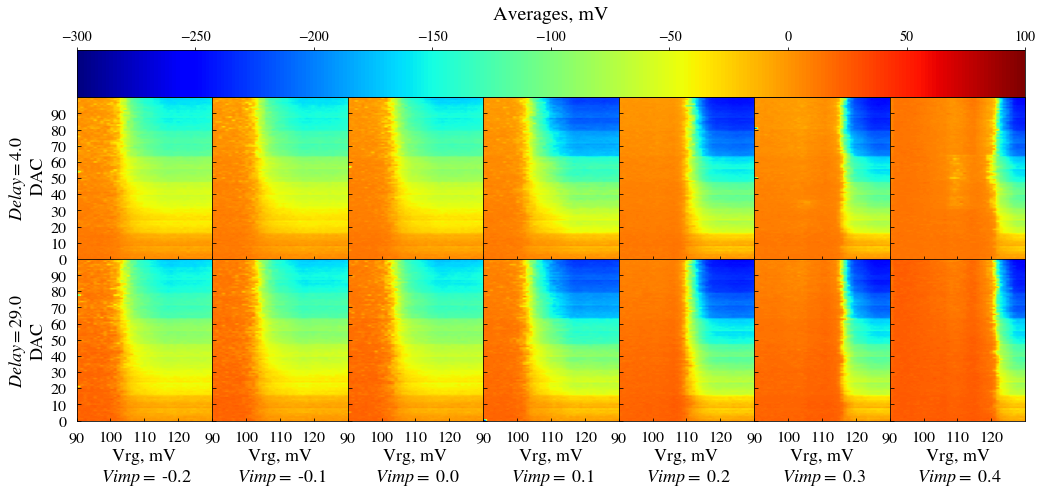

In [249]:


Vmin =-0.3*1000
Vmax=0.1*1000

Vrg_tick = 1000*np.arange(min(Vrgs),max(Vrgs)+0.0,0.01)
cdac_aIU2s_tick = np.arange(min(cdac_aIU2s),max(cdac_aIU2s)+0.01,10)

extent =  1000*min(Vrgs), 1000*max(Vrgs), min(cdac_aIU2s), max(cdac_aIU2s)



fig, axs = plt.subplots(nrows=2, ncols=7, sharex='all', sharey='all', figsize=(17,7), gridspec_kw={'hspace': 0.0, 'wspace': 0.0})



med=1

for i in range(len(Vimps)):
    Vimp=round(Vimps[i],1)
    X = sp.ndimage.filters.median_filter(Averages[(sqf_define_pdelays[0],Vimp)][0], (med,med), mode='nearest').T
    c = axs[0,i].imshow(1000*X ,extent=extent, vmin=Vmin, vmax=Vmax,  cmap='jet', origin='lower', filternorm =True, aspect='auto',interpolation = None)
    X = sp.ndimage.filters.median_filter(Averages[(sqf_define_pdelays[1],Vimp)][0], (med,med), mode='nearest').T
    c = axs[1,i].imshow(1000*X ,extent=extent,vmin=Vmin, vmax=Vmax,  cmap='jet', origin='lower', filternorm =True, aspect='auto',interpolation = None)
    axs[1,i].set_xlabel(f"Vrg, mV\n $Vimp =$ {Vimp}", fontsize = 18) 
    if i==1:
        axs[0,0].set_ylabel(f'$Delay = {sqf_define_pdelays[0]}$\n DAC', fontsize = 18)
        axs[1,0].set_ylabel(f'$Delay = {sqf_define_pdelays[1]}$\nDAC', fontsize = 18)
        


axs[0,0].tick_params(axis="y",direction="in")
axs[1,0].tick_params(axis="y",direction="in")

for ax in axs:
    for i in range(7):
        ax[i].tick_params(axis="x",direction="in", labelsize=16,  pad=10)
        ax[i].tick_params(axis="y",direction="in", labelsize=16,  pad=10)


axs[0,0].tick_params(axis='y', labelsize=16)
axs[1,0].tick_params(axis='y', labelsize=16)
        
        
axs[1,1].set_xticks(Vrg_tick[:-1])   

axs[0,0].set_yticks(cdac_aIU2s_tick[:-1])   
axs[1,0].set_yticks(cdac_aIU2s_tick[:-1])   




cbar = fig.colorbar(c, ax=axs.ravel().tolist(), shrink=1, pad=0.0, location = 'top')
cbar.set_label(f'Averages, mV', rotation=0,fontsize = 20,labelpad=10)
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.tick_params(labelsize=14, axis='y', direction='in',pad=4)
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.tick_params(labelsize=14)

plt.savefig(f'Averages Vanop0 [DAC Vrg].png', format='png',dpi=600, bbox_inches="tight")        

        
plt.show()

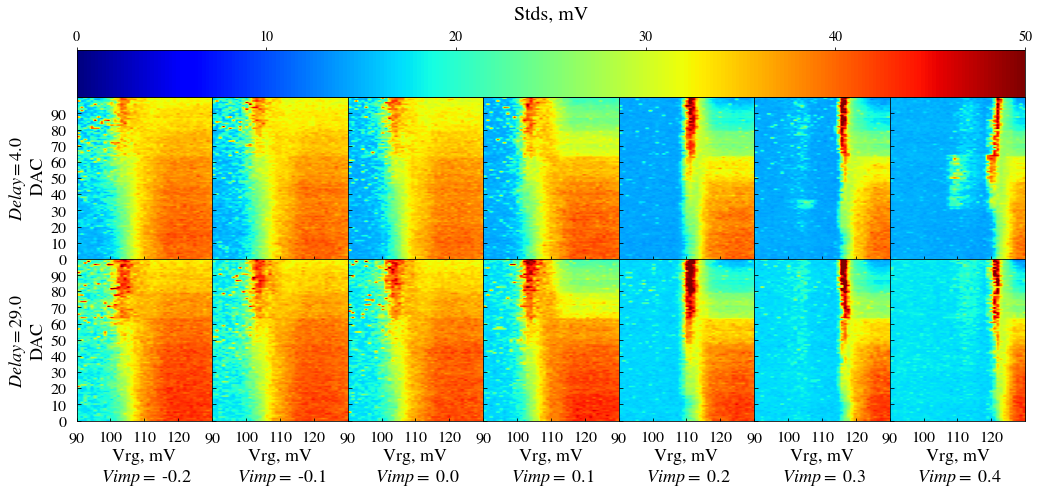

In [251]:


Vmin =-0.*1000
Vmax=0.05*1000

Vrg_tick = 1000*np.arange(min(Vrgs),max(Vrgs)+0.0,0.01)
cdac_aIU2s_tick = np.arange(min(cdac_aIU2s),max(cdac_aIU2s)+0.01,10)

extent =  1000*min(Vrgs), 1000*max(Vrgs), min(cdac_aIU2s), max(cdac_aIU2s)



fig, axs = plt.subplots(nrows=2, ncols=7, sharex='all', sharey='all', figsize=(17,7), gridspec_kw={'hspace': 0.0, 'wspace': 0.0})



med=1

for i in range(len(Vimps)):
    Vimp=round(Vimps[i],1)
    X = sp.ndimage.filters.median_filter(Stds[(sqf_define_pdelays[0],Vimp)][0], (med,med), mode='nearest').T
    c = axs[0,i].imshow(1000*X ,extent=extent, vmin=Vmin, vmax=Vmax,  cmap='jet', origin='lower', filternorm =True, aspect='auto',interpolation = None)
    X = sp.ndimage.filters.median_filter(Stds[(sqf_define_pdelays[1],Vimp)][0], (med,med), mode='nearest').T
    c = axs[1,i].imshow(1000*X ,extent=extent,vmin=Vmin, vmax=Vmax,  cmap='jet', origin='lower', filternorm =True, aspect='auto',interpolation = None)
    axs[1,i].set_xlabel(f"Vrg, mV\n $Vimp =$ {Vimp}", fontsize = 18) 
    if i==1:
        axs[0,0].set_ylabel(f'$Delay = {sqf_define_pdelays[0]}$\n DAC', fontsize = 18)
        axs[1,0].set_ylabel(f'$Delay = {sqf_define_pdelays[1]}$\nDAC', fontsize = 18)
        


axs[0,0].tick_params(axis="y",direction="in")
axs[1,0].tick_params(axis="y",direction="in")

for ax in axs:
    for i in range(7):
        ax[i].tick_params(axis="x",direction="in", labelsize=16,  pad=10)
        ax[i].tick_params(axis="y",direction="in", labelsize=16,  pad=10)


axs[0,0].tick_params(axis='y', labelsize=16)
axs[1,0].tick_params(axis='y', labelsize=16)
        
        
axs[1,1].set_xticks(Vrg_tick[:-1])   

axs[0,0].set_yticks(cdac_aIU2s_tick[:-1])   
axs[1,0].set_yticks(cdac_aIU2s_tick[:-1])   




cbar = fig.colorbar(c, ax=axs.ravel().tolist(), shrink=1, pad=0.0, location = 'top')
cbar.set_label(f'Stds, mV', rotation=0,fontsize = 20,labelpad=10)
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.tick_params(labelsize=14, axis='y', direction='in',pad=4)
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.tick_params(labelsize=14)

plt.savefig(f'Stds Vanop0 [DAC Vrg].png', format='png',dpi=600, bbox_inches="tight")        

        
plt.show()

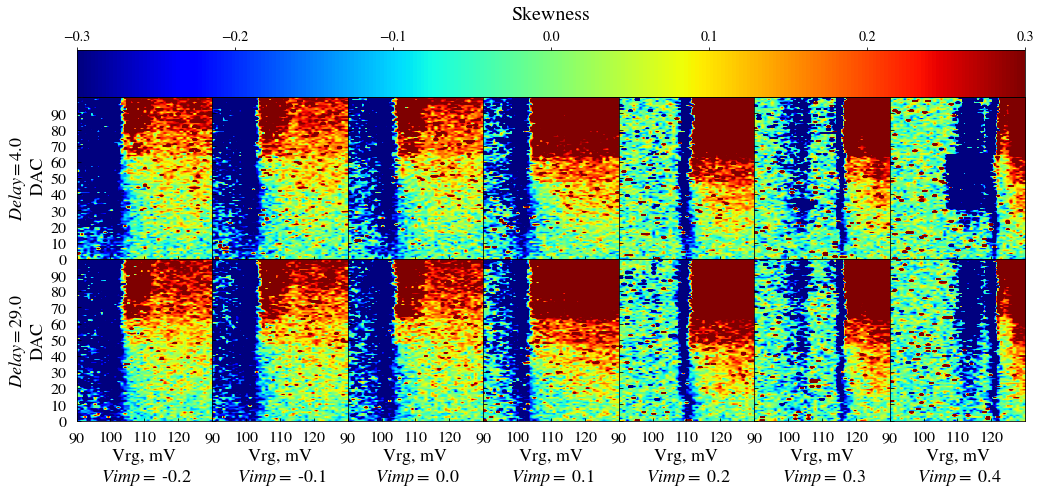

In [253]:


Vmin =-0.3*1
Vmax=0.3*1

Vrg_tick = 1000*np.arange(min(Vrgs),max(Vrgs)+0.0,0.01)
cdac_aIU2s_tick = np.arange(min(cdac_aIU2s),max(cdac_aIU2s)+0.01,10)

extent =  1000*min(Vrgs), 1000*max(Vrgs), min(cdac_aIU2s), max(cdac_aIU2s)



fig, axs = plt.subplots(nrows=2, ncols=7, sharex='all', sharey='all', figsize=(17,7), gridspec_kw={'hspace': 0.0, 'wspace': 0.0})



med=1

for i in range(len(Vimps)):
    Vimp=round(Vimps[i],1)
    X = sp.ndimage.filters.median_filter(Skews[(sqf_define_pdelays[0],Vimp)][0], (med,med), mode='nearest').T
    c = axs[0,i].imshow(1*X ,extent=extent, vmin=Vmin, vmax=Vmax,  cmap='jet', origin='lower', filternorm =True, aspect='auto',interpolation = None)
    X = sp.ndimage.filters.median_filter(Skews[(sqf_define_pdelays[1],Vimp)][0], (med,med), mode='nearest').T
    c = axs[1,i].imshow(1*X ,extent=extent,vmin=Vmin, vmax=Vmax,  cmap='jet', origin='lower', filternorm =True, aspect='auto',interpolation = None)
    axs[1,i].set_xlabel(f"Vrg, mV\n $Vimp =$ {Vimp}", fontsize = 18) 
    if i==1:
        axs[0,0].set_ylabel(f'$Delay = {sqf_define_pdelays[0]}$\n DAC', fontsize = 18)
        axs[1,0].set_ylabel(f'$Delay = {sqf_define_pdelays[1]}$\nDAC', fontsize = 18)
        


axs[0,0].tick_params(axis="y",direction="in")
axs[1,0].tick_params(axis="y",direction="in")

for ax in axs:
    for i in range(7):
        ax[i].tick_params(axis="x",direction="in", labelsize=16,  pad=10)
        ax[i].tick_params(axis="y",direction="in", labelsize=16,  pad=10)


axs[0,0].tick_params(axis='y', labelsize=16)
axs[1,0].tick_params(axis='y', labelsize=16)
        
        
axs[1,1].set_xticks(Vrg_tick[:-1])   

axs[0,0].set_yticks(cdac_aIU2s_tick[:-1])   
axs[1,0].set_yticks(cdac_aIU2s_tick[:-1])   




cbar = fig.colorbar(c, ax=axs.ravel().tolist(), shrink=1, pad=0.0, location = 'top')
cbar.set_label(f'Skewness', rotation=0,fontsize = 20,labelpad=10)
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.tick_params(labelsize=14, axis='y', direction='in',pad=4)
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.tick_params(labelsize=14)

plt.savefig(f'Skews Vanop0 [DAC Vrg].png', format='png',dpi=600, bbox_inches="tight")        

        
plt.show()

In [245]:
Vrg_tick

array([ 90., 100., 110., 120., 130., 140.])

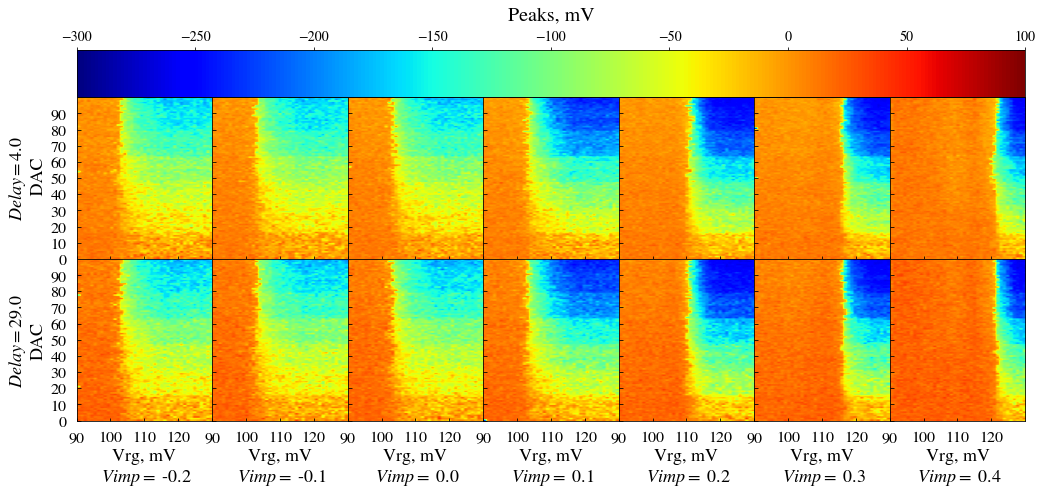

In [254]:


Vmin =-0.3*1000
Vmax=0.1*1000

Vrg_tick = 1000*np.arange(min(Vrgs),max(Vrgs)+0.0,0.01)
cdac_aIU2s_tick = np.arange(min(cdac_aIU2s),max(cdac_aIU2s)+0.01,10)

extent =  1000*min(Vrgs), 1000*max(Vrgs), min(cdac_aIU2s), max(cdac_aIU2s)



fig, axs = plt.subplots(nrows=2, ncols=7, sharex='all', sharey='all', figsize=(17,7), gridspec_kw={'hspace': 0.0, 'wspace': 0.0})



med=1

for i in range(len(Vimps)):
    Vimp=round(Vimps[i],1)
    X = sp.ndimage.filters.median_filter(Peaks[(sqf_define_pdelays[0],Vimp)][0], (med,med), mode='nearest').T
    c = axs[0,i].imshow(1000*X ,extent=extent, vmin=Vmin, vmax=Vmax,  cmap='jet', origin='lower', filternorm =True, aspect='auto',interpolation = None)
    X = sp.ndimage.filters.median_filter(Peaks[(sqf_define_pdelays[1],Vimp)][0], (med,med), mode='nearest').T
    c = axs[1,i].imshow(1000*X ,extent=extent,vmin=Vmin, vmax=Vmax,  cmap='jet', origin='lower', filternorm =True, aspect='auto',interpolation = None)
    axs[1,i].set_xlabel(f"Vrg, mV\n $Vimp =$ {Vimp}", fontsize = 18) 
    if i==1:
        axs[0,0].set_ylabel(f'$Delay = {sqf_define_pdelays[0]}$\n DAC', fontsize = 18)
        axs[1,0].set_ylabel(f'$Delay = {sqf_define_pdelays[1]}$\nDAC', fontsize = 18)
        


axs[0,0].tick_params(axis="y",direction="in")
axs[1,0].tick_params(axis="y",direction="in")

for ax in axs:
    for i in range(7):
        ax[i].tick_params(axis="x",direction="in", labelsize=16,  pad=10)
        ax[i].tick_params(axis="y",direction="in", labelsize=16,  pad=10)


axs[0,0].tick_params(axis='y', labelsize=16)
axs[1,0].tick_params(axis='y', labelsize=16)
        
        
axs[1,1].set_xticks(Vrg_tick[:-1])   

axs[0,0].set_yticks(cdac_aIU2s_tick[:-1])   
axs[1,0].set_yticks(cdac_aIU2s_tick[:-1])   




cbar = fig.colorbar(c, ax=axs.ravel().tolist(), shrink=1, pad=0.0, location = 'top')
cbar.set_label(f'Peaks, mV', rotation=0,fontsize = 20,labelpad=10)
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.tick_params(labelsize=14, axis='y', direction='in',pad=4)
ticklabs = cbar.ax.get_yticklabels()
cbar.ax.tick_params(labelsize=14)

plt.savefig(f'Peaks Vanop0 [DAC Vrg].png', format='png',dpi=600, bbox_inches="tight")        

        
plt.show()

In [135]:
cdac_aIU2=70
Vimp=0.3
Vrg = 0.116



0.1

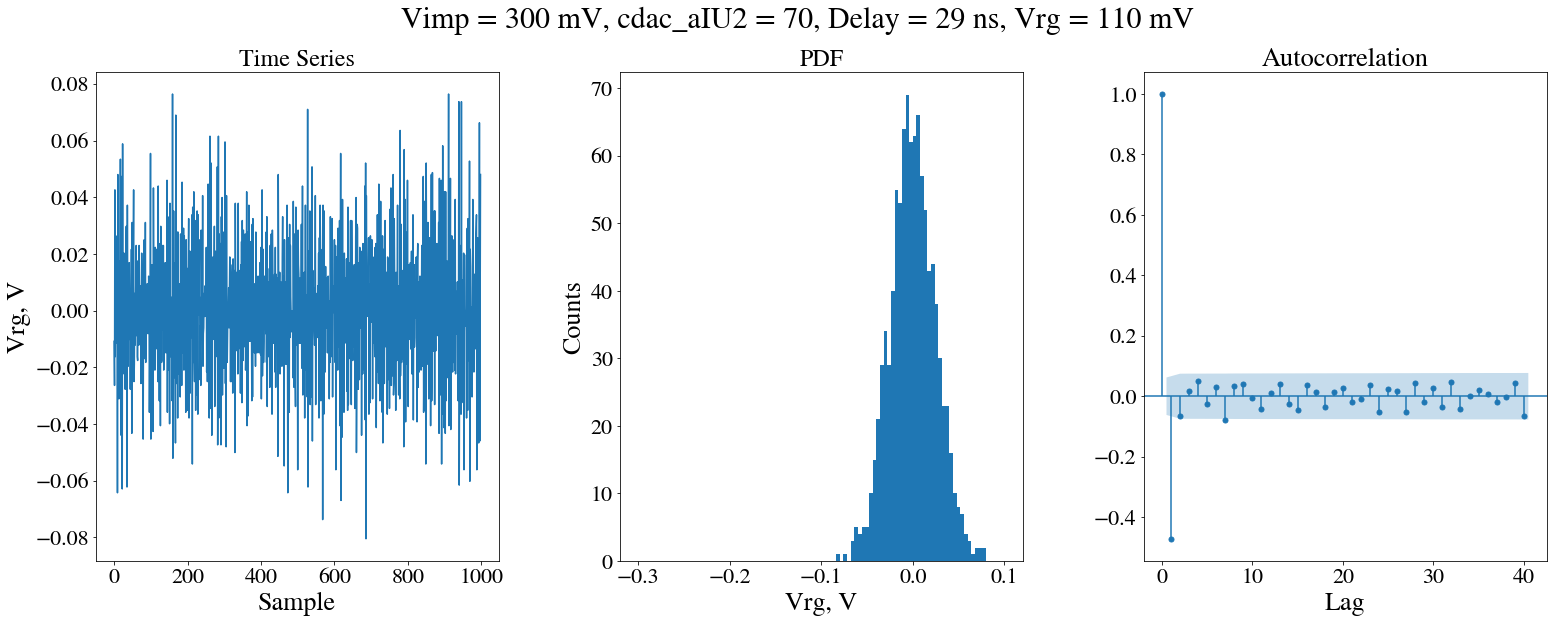

In [465]:
cdac_aIU2=70
Delay = 29
Vimp=0.3
Vrg = 0.11
Vrg=Vrgs[np.argmin(abs(Vrgs-Vrg))]

sub =grouped.get_group((Delay,cdac_aIU2,Vimp,Vrg))


Y = np.array(sub.Vanop0_adc_data)
Y = np.diff(Y)

# Y = (Y<np.median(Y)).astype('int')


import statsmodels.api as sm
fig, axs = plt.subplots(nrows=1, ncols=3,  sharex='none', sharey='none', figsize=(26,9), gridspec_kw={'hspace': 0.31, 'wspace': 0.3})

title = f'Vimp = {int(1000*Vimp)} mV, cdac_aIU2 = {cdac_aIU2}, Delay = {Delay} ns, Vrg = {int(1000*Vrg)} mV'

axs[1].hist(Y, 100,[-0.3,0.1], density=False, label='Measured histogram')
axs[0].plot(Y)
# axs[2].plot_acf(Y, lags = 400)
sm.graphics.tsa.plot_acf(Y, lags=40, ax=axs[2])
axs[1].set_title('PDF', fontsize = 24)
axs[0].set_title('Time Series', fontsize = 24)
axs[1].set_xlabel('Vrg, V', fontsize = 26) 
axs[0].set_xlabel('Sample', fontsize = 26) 
axs[2].set_xlabel('Lag', fontsize = 26) 
axs[1].set_ylabel('Counts', fontsize = 26) 
axs[0].set_ylabel('Vrg, V', fontsize = 26) 
plt.suptitle(title, fontsize = 30)
# axs[0, 0].legend(fontsize=24,loc='upper left')
# axs[0, 1].legend(fontsize=24,loc='upper right')
# axs[1, 0].legend(fontsize=24,loc='upper left')
# axs[1, 1].legend(fontsize=24,loc='upper right')
# axs[1, 1].set_yscale('log')
# plt.savefig(title+' Vanop0.pdf', format='pdf', bbox_inches="tight")        


plt.show()


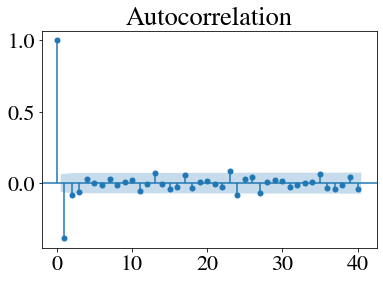

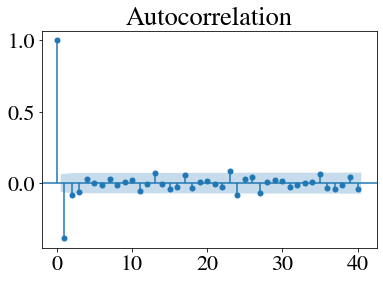

In [463]:
# test


Np=1000

a=0.8
x=0
X = np.zeros(Np)
x=np.sign(np.random.randn() )
for i in range(Np):

    x= (1-a)*x + a*np.random.randn()

    X[i]=(x)  

X = np.diff(X)    
    
sm.graphics.tsa.plot_acf(X, lags=40)    

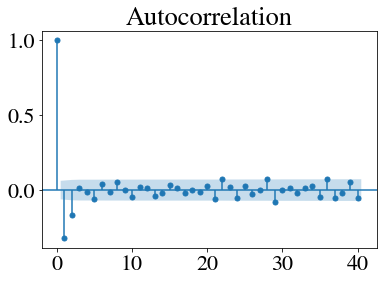

In [455]:


Np=1000

a=0.8

X = np.zeros(Np)
x=np.sign(np.random.randn() )
y0=y1=0
for i in range(Np):
    y1 = np.random.randn()
    x= (1-a)*y0+a*y1
    y0=y1

    X[i]=(x)  

X = np.diff(X)  
_=sm.graphics.tsa.plot_acf(X, lags=40)    

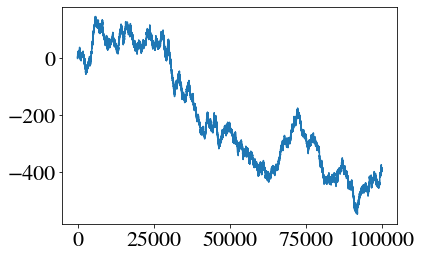

In [429]:
plt.plot(np.cumsum(X))

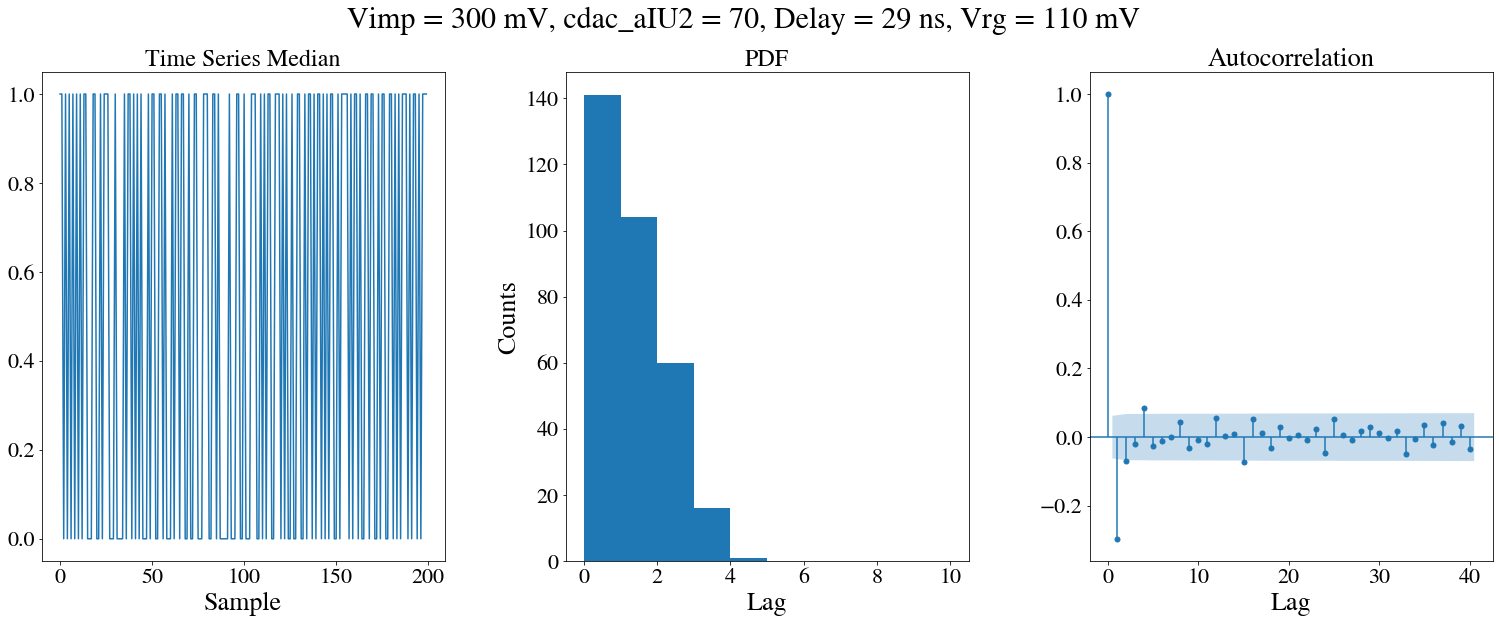

In [472]:
X1 = (Y<-0.0+np.median(Y)).astype('int')
T=[]
xlast=X1[0]
t=0
for x in X1:
    t=t+1
    if x!=xlast:
        T.append(t)
        t=0

T = np.diff(T)

import statsmodels.api as sm
fig, axs = plt.subplots(nrows=1, ncols=3,  sharex='none', sharey='none', figsize=(26,9), gridspec_kw={'hspace': 0.31, 'wspace': 0.3})

title = f'Vimp = {int(1000*Vimp)} mV, cdac_aIU2 = {cdac_aIU2}, Delay = {Delay} ns, Vrg = {int(1000*Vrg)} mV'

axs[1].hist(T, 10,[0,10], density=False, label='Measured histogram')
axs[0].plot(X1[:200])
# axs[2].plot_acf(Y, lags = 400)
sm.graphics.tsa.plot_acf(X1, lags=40, ax=axs[2])
axs[1].set_title('PDF', fontsize = 24)
axs[0].set_title('Time Series Median', fontsize = 24)
axs[1].set_xlabel('Lag', fontsize = 26) 
axs[0].set_xlabel('Sample', fontsize = 26) 
axs[2].set_xlabel('Lag', fontsize = 26) 
axs[1].set_ylabel('Counts', fontsize = 26) 
# axs[0].set_ylabel('Vrg, V', fontsize = 26) 
plt.suptitle(title, fontsize = 30)
# axs[0, 0].legend(fontsize=24,loc='upper left')
# axs[0, 1].legend(fontsize=24,loc='upper right')
# axs[1, 0].legend(fontsize=24,loc='upper left')
# axs[1, 1].legend(fontsize=24,loc='upper right')
# axs[1, 1].set_yscale('log')
plt.savefig(title+' Vanop0 Median.pdf', format='pdf', bbox_inches="tight")        


plt.show()



<ipython-input-680-20e9c62c16ae>:76: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fa263e7ec10> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[0, 2].legend(labels = ['Autocorrelation','_nolegend_','ACF(x) $= k a^x+(1-k)b^x$\n $k=0.75,~a=0.3,~b=0.9$'],fontsize=18,loc='upper right')
<ipython-input-680-20e9c62c16ae>:78: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fa273fa0d00> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[0, 1].legend(labels = ['_nolegend_','_nolegend_','Histogram Vanop0'],fontsize=18,loc='upper right')
<ipython-input-680-20e9c62c16ae>:78: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fa273fa0760> has a label of '_nolegend_' which cannot be automatically added to the legend.
  axs[0, 1].legend(labels = ['_nolegend_','_nolegend_','Histogram Vanop0'],fontsize=18,loc='upper right')


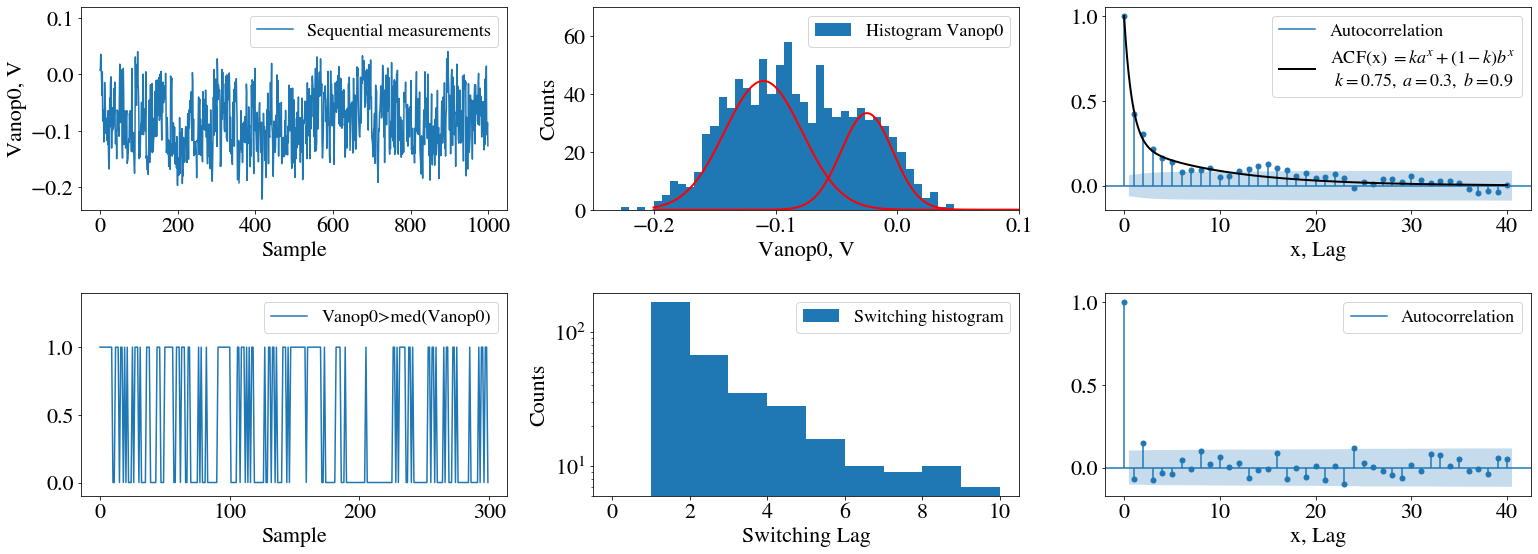

In [680]:
## All pics


cdac_aIU2=70
Delay = 29
Vimp=0.3
Vrg = 0.117
Vrg=Vrgs[np.argmin(abs(Vrgs-Vrg))]

sub =grouped.get_group((Delay,cdac_aIU2,Vimp,Vrg))


Y = np.array(sub.Vanop0_adc_data)
# Y = np.diff(Y)

Z = (Y>np.median(Y)).astype('int')

T=[]
xlast=Z[0]
t=0
for x in Z:
    t=t+1
    if x!=xlast:
        T.append(t)
        t=0
        xlast=x

# T = np.diff(T)

import statsmodels.api as sm
fig, axs = plt.subplots(nrows=2, ncols=3,  sharex='none', sharey='none', figsize=(26,9), gridspec_kw={'hspace': 0.41, 'wspace': 0.2})

title = f'Vimp = {int(1000*Vimp)} mV, cdac_aIU2 = {cdac_aIU2}, Delay = {Delay} ns, Vrg = {int(1000*Vrg)} mV'

axs[0,1].hist(Y, 60,[-0.3,0.1], density=False, label='Measured histogram')
axs[0,0].plot(Y,label='Sequential measurements')
# axs[2].plot_acf(Y, lags = 400)
sm.graphics.tsa.plot_acf(Y, lags=40, ax=axs[0,2])

# fitacf = 0.55**np.array(range(40))
# fitacf = np.array(range(1,40))**(-1.2)
# axs[0,2].plot(fitacf,label='Fit acf')

a,b,g = 0.3, 0.9, 0.75
xx = np.linspace(0,40,1000)
fitacf = g*a**xx + (1-g)*b**xx

axs[0,2].plot(xx,fitacf,label='Fit acf',color='black',linewidth=2)

m,s= -0.025, 0.03
xx = np.linspace(-0.2,0.1,1000)
yy = 1/s *np.exp(-(xx-m)**2/s**2)
axs[0,1].plot(xx,yy,label='Fit acf',color='red',linewidth=2)

m,s= -0.11, 0.045
yy = 2*1/s *np.exp(-(xx-m)**2/s**2)
axs[0,1].plot(xx,yy,label='Fit acf',color='red',linewidth=2)



axs[0,1].set_title('', fontsize = 24)
# axs[0,0].set_title('Time Series', fontsize = 24)
axs[0,2].set_title('', fontsize = 24)
axs[0,1].set_xlabel('Vanop0, V', fontsize = 22) 
axs[0,0].set_xlabel('Sample', fontsize = 22) 
axs[0,2].set_xlabel('x, Lag', fontsize = 22) 
axs[0,1].set_ylabel('Counts', fontsize = 22) 
axs[0,0].set_ylabel('Vanop0, V', fontsize = 22) 
axs[0,0].set_ylim([-0.24,0.12]) 
axs[0,1].set_ylim([0,70]) 
axs[0,1].set_xlim([-0.25,0.1]) 
# plt.suptitle(title, fontsize = 30)
axs[0, 0].legend(fontsize=18,loc='upper right')
axs[0, 1].legend(fontsize=18,loc='upper right')
axs[0, 2].legend(labels = ['Autocorrelation'],fontsize=18,loc='upper right')
axs[0, 2].legend(labels = ['Autocorrelation','_nolegend_','ACF(x) $= k a^x+(1-k)b^x$\n $k=0.75,~a=0.3,~b=0.9$'],fontsize=18,loc='upper right')

axs[0, 1].legend(labels = ['_nolegend_','_nolegend_','Histogram Vanop0'],fontsize=18,loc='upper right')






axs[1,1].hist(T, 10,[0,10], density=False, label='Switching histogram')
axs[1,0].plot(Z[:300],label='Vanop0>med(Vanop0)')
# axs[2].plot_acf(Y, lags = 400)
sm.graphics.tsa.plot_acf(T, lags=40, ax=axs[1,2])
axs[1,1].set_title('', fontsize = 24)
# axs[0,0].set_title('Time Series', fontsize = 24)
axs[1,2].set_title('', fontsize = 24)
axs[1,1].set_xlabel('Switching Lag', fontsize = 22) 
axs[1,0].set_xlabel('Sample', fontsize = 22) 
axs[1,2].set_xlabel('x, Lag', fontsize = 22) 
axs[1,1].set_ylabel('Counts', fontsize = 22) 
axs[1,0].set_ylabel('', fontsize = 22) 
axs[1,0].set_ylim([-0.1,1.4]) 
# axs[1,1].set_ylim([0,50]) 
# axs[1,1].set_xlim([-0.25,0.1]) 
# plt.suptitle(title, fontsize = 30)
axs[1, 0].legend(fontsize=18,loc='upper right')
axs[1, 1].legend(fontsize=18,loc='upper right')
axs[1, 2].legend(labels = ['Autocorrelation'],fontsize=18,loc='upper right')

# axs[0, 2].set_yscale('log')
# axs[0, 2].set_xscale('log')

axs[1, 1].set_yscale('log')

plt.savefig(title+' Vanop0.pdf', format='pdf', bbox_inches="tight")        


plt.show()



In [581]:
np.array(range(1,10))**-0

array([1.        , 0.50347778, 0.33701556, 0.25348987, 0.20324492,
       0.16967985, 0.14566424, 0.12762652, 0.11357949])

In [311]:
T=[]
xlast=X1[0]
t=0
for x in X1:
    t=t+1
    if x!=xlast:
        T.append(t)
        t=0

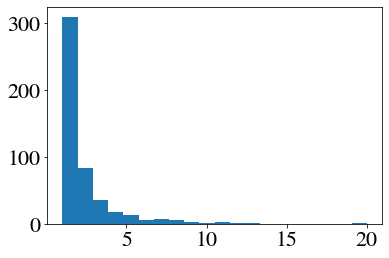

In [324]:
_=plt.hist(T, 20, density=False, label='Measured histogram')
# plt.yscale('log')

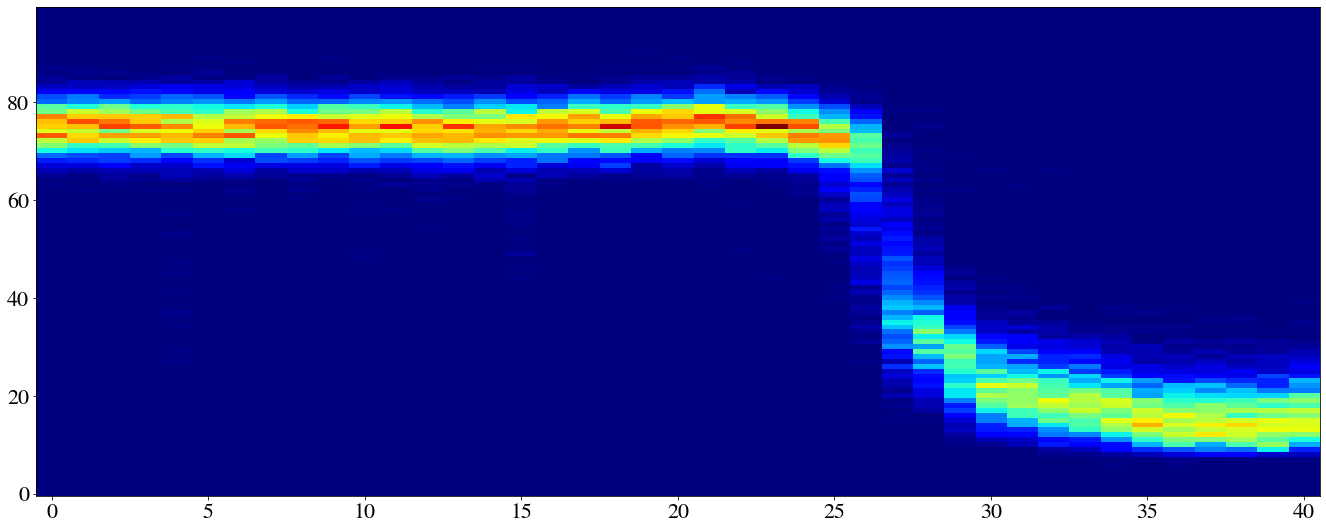

In [368]:
cdac_aIU2=90
Delay = 4
Vimp=0.3
hists = []

for Vrg in Vrgs:
    sub =grouped.get_group((Delay,cdac_aIU2,Vimp,Vrg))
    Y = np.array(sub.Vanop0_adc_data)
    H = np.histogram(Y,100,[-0.3,0.1], density=False)[0]
    hists.append(H)
hists = np.array(hists)    
fig =plt.figure(figsize=(23,9))

med=1
X = sp.ndimage.filters.median_filter(hists, (med,med), mode='nearest').T
plt.imshow(1000*X , cmap='jet', origin='lower', filternorm =True, aspect='auto',interpolation = None)

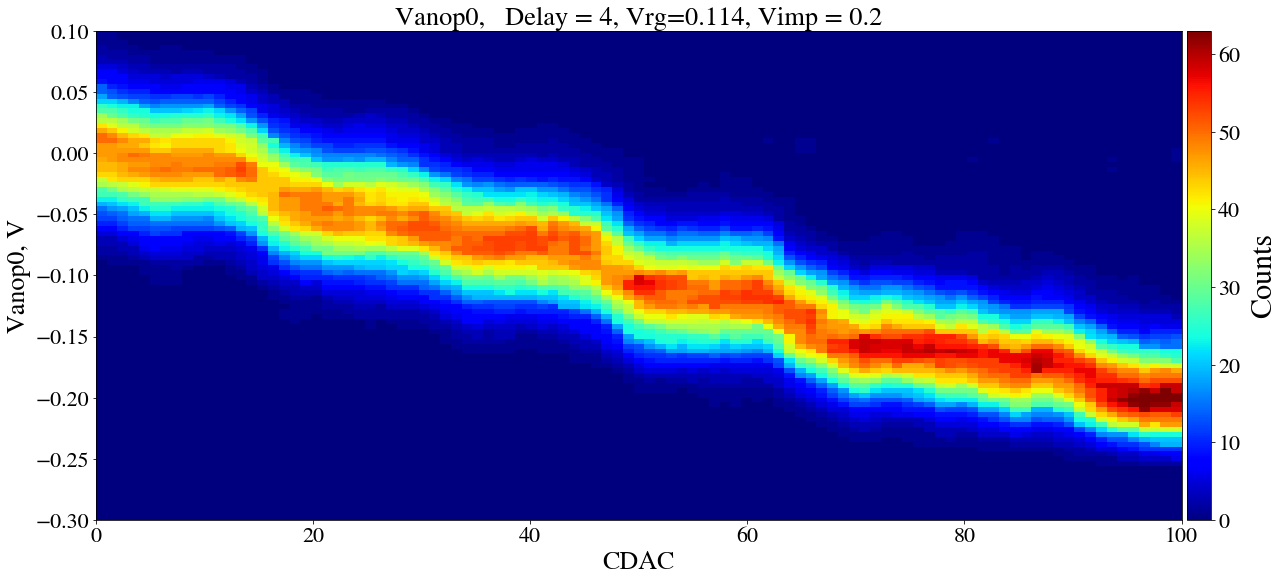

In [374]:
Vrg = 0.114
Vrg=Vrgs[np.argmin(abs(Vrgs-Vrg))]
Delay = 4
Vimp=0.2
hists = []


VanopMin = -0.3
VanopMax = 0.1
bins = 100

title = f'Vanop0,   Delay = {Delay}, Vrg={Vrg}, Vimp = {Vimp}'

fig =plt.figure(figsize=(23,9))
for cdac_aIU2 in cdac_aIU2s:
    sub =grouped.get_group((Delay,cdac_aIU2,Vimp,Vrg))
    Y = np.array(sub.Vanop0_adc_data)
    H = np.histogram(Y,bins,[VanopMin, VanopMax], density=False)[0]
    hists.append(H)
hists = np.array(hists)    





extent =  1*min(cdac_aIU2s), 1*max(cdac_aIU2s), VanopMin, VanopMax

med=5
X = sp.ndimage.filters.median_filter(hists, (med,med), mode='nearest').T
c=plt.imshow(1*X ,extent=extent, cmap='jet', origin='lower', filternorm =True, aspect='auto',interpolation = None)

cbar = fig.colorbar(c, shrink=1, pad=0.004)
cbar.set_label('Counts', rotation=90,fontsize = 30,labelpad=10)
plt.title(title)

plt.xlabel('CDAC', fontsize = 26) 
plt.ylabel('Vanop0, V', fontsize = 26) 

# plt.savefig('Heatmap '+title+'.pdf', format='pdf', bbox_inches="tight")    
plt.show()

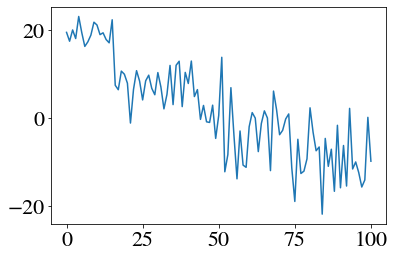

In [201]:
V = np.linspace(-0.3,0.1,100)
plt.plot(hists@V)

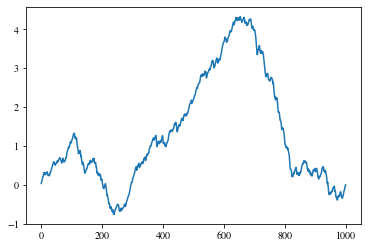

In [263]:
plt.plot(np.cumsum(Y-np.mean(Y)))

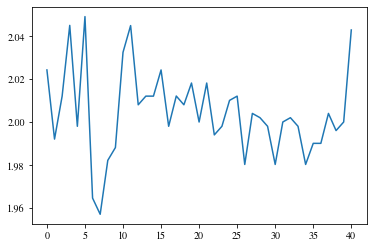

In [353]:
cdac_aIU2=50
Vimp=-0.1
Tavg =[]


for Vrg in Vrgs:
    Vrg=Vrgs[np.argmin(abs(Vrgs-Vrg))]

    sub =grouped.get_group((29,cdac_aIU2,Vimp,Vrg))



    Y = np.array(sub.Vanop0_adc_data)

    X1 = (Y<np.median(Y)).astype('int')

    T=[]
    xlast=X1[0]
    t=0
    for x in X1:
        t=t+1
        if x!=xlast:
            T.append(t)
            t=0
    Tavg.append(np.mean(T) )     

plt.plot(Tavg)

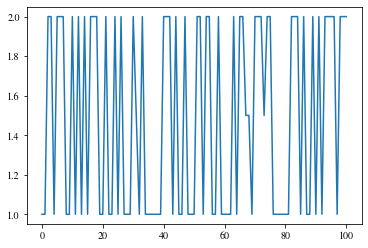

In [385]:
Vrg = 0.13
Vrg=Vrgs[np.argmin(abs(Vrgs-Vrg))]
Vimp= 0.2
Tavg =[]


for cdac_aIU2 in cdac_aIU2s:
    

    sub =grouped.get_group((29,cdac_aIU2,Vimp,Vrg))



    Y = np.array(sub.Vanop0_adc_data)

    X1 = (Y<np.median(Y)).astype('int')

    T=[]
    xlast=X1[0]
    t=0
    for x in X1:
        t=t+1
        if x!=xlast:
            T.append(t)
            t=0
    Tavg.append(np.median(T) )     

plt.plot(Tavg)



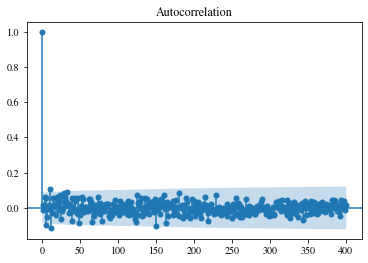

In [329]:
_=plot_acf(T, lags = 400)

In [355]:
cdac_aIU2s

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])